# **Energy-Consumption Analysis using Data Clustering
# Approach: A Case Study of NYC Residences**

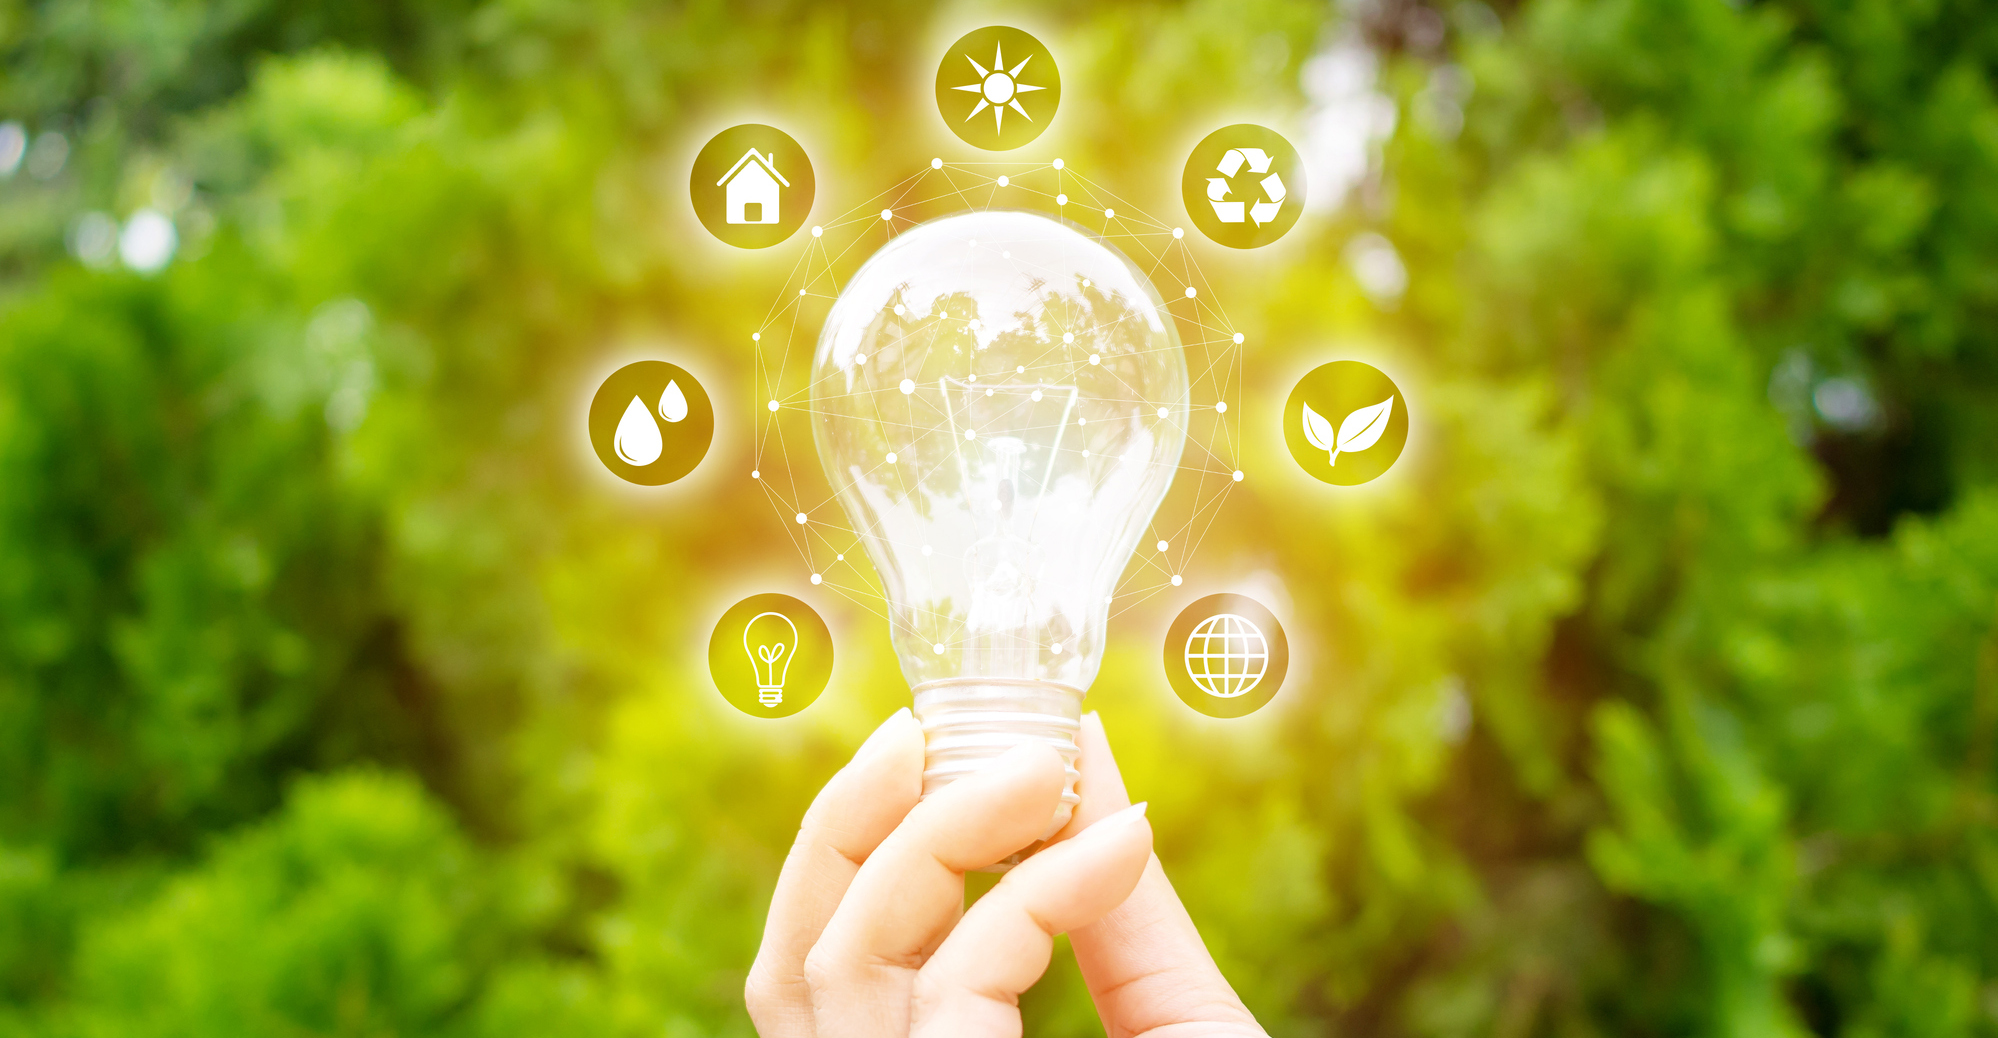

# Required Libraries

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from pylab import rcParams
import statsmodels.api as sm
from matplotlib import pyplot
import sklearn.manifold as mani
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
import sklearn.metrics.pairwise as pairs
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Reading Dataset from Google Drive

## Allowing the access to the Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Listing the Files of the G Drive

In [3]:
!ls "/content/drive/My Drive"

'Buildsys Paper'
 CS5734-S21ArticulationWork.pdf
 CSCW_Spring21
 Energy_Consumption_Analysis_20_July.ipynb
 metadata.csv
 minute_data_newyork.csv
'Models of HCI'
'PhD Research   Asma'
 UrbComp_Project
'Usability Engineering Project   Gazelle'


## Reading Dataset of Energy

In [4]:
!cp "/content/drive/My Drive/minute_data_newyork.csv" "minute_data_newyork.csv"
minute_data = pd.read_csv("minute_data_newyork.csv")
minute_data.head(5)

,dataid,localminute,air1,air2,air3,airwindowunit1,aquarium1,bathroom1,bathroom2,bedroom1,bedroom2,bedroom3,bedroom4,bedroom5,battery1,car1,car2,circpump1,clotheswasher1,clotheswasher_dryg1,diningroom1,diningroom2,dishwasher1,disposal1,drye1,dryg1,freezer1,furnace1,furnace2,garage1,garage2,grid,heater1,heater2,heater3,housefan1,icemaker1,jacuzzi1,kitchen1,kitchen2,kitchenapp1,kitchenapp2,lights_plugs1,lights_plugs2,lights_plugs3,lights_plugs4,lights_plugs5,lights_plugs6,livingroom1,livingroom2,microwave1,office1,outsidelights_plugs1,outsidelights_plugs2,oven1,oven2,pool1,pool2,poollight1,poolpump1,pump1,range1,refrigerator1,refrigerator2,security1,sewerpump1,shed1,solar,solar2,sprinkler1,sumppump1,utilityroom1,venthood1,waterheater1,waterheater2,wellpump1,winecooler1,leg1v,leg2v
0,5997,2019-06-24 15:55:00-05,NaN,NaN,NaN,NaN,NaN,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.003,NaN,-1.036,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002,NaN,0.011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.686,NaN,NaN,NaN,0.503,NaN,0.0,NaN,NaN,NaN,122.046,122.846
1,3700,2019-06-24 15:59:00-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.469,0.001,NaN,NaN,NaN,NaN,NaN,0.002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.012,NaN,0.003,NaN,NaN,NaN,0.006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,122.837,122.618
2,3700,2019-06-24 15:58:00-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.513,0.000,NaN,NaN,NaN,NaN,NaN,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.012,NaN,0.003,NaN,NaN,NaN,0.006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,122.740,122.503
3,3700,2019-06-24 15:57:00-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.470,0.000,NaN,NaN,NaN,NaN,NaN,0.002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.012,NaN,0.003,NaN,NaN,NaN,0.006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.047,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,122.682,122.432
4,3700,2019-06-24 15:56:00-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.469,0.001,NaN,NaN,NaN,NaN,NaN,0.002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.012,NaN,0.003,NaN,NaN,NaN,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,122.754,122.492


## Reading Data of Building Type

In [5]:
!cp "/content/drive/My Drive/metadata.csv" "metadata.csv"
metadata = pd.read_csv("metadata.csv")
metadata.head(5)

,dataid,active_record,building_type,city,state,egauge_1min_min_time,egauge_1min_max_time,egauge_1min_data_availability,egauge_1s_min_time,egauge_1s_max_time,egauge_1s_data_availability,air1,air2,air3,airwindowunit1,aquarium1,bathroom1,bathroom2,bedroom1,bedroom2,bedroom3,bedroom4,bedroom5,battery1,car1,car2,circpump1,clotheswasher1,clotheswasher_dryg1,diningroom1,diningroom2,dishwasher1,disposal1,drye1,dryg1,freezer1,furnace1,furnace2,garage1,garage2,...,water_ert_max_time,water_data_availability,gas_ert_min_time,gas_ert_max_time,gas_data_availability,indoor_temp_min_time,indoor_temp_max_time,indoor_temp_data_availability,date_enrolled,date_withdrawn,house_construction_year,total_square_footage,first_floor_square_footage,second_floor_square_footage,third_floor_square_footage,half_floor_square_footage,lower_level_square_footage,pv,pv_panel_direction,total_amount_of_pv,amount_of_south_facing_pv,amount_of_west_facing_pv,amount_of_east_facing_pv,number_of_nests,audit_2011,audit_2013_2014,survey_2011,survey_2012,survey_2013,survey_2014,survey_2017,survey_2019,program_579,program_baseline,program_energy_internet_demo,program_lg_appliance,program_verizon,program_ccet_group,program_civita_group,program_shines
0,The unique identifier for the home. To be more...,this field will show yes if this participant i...,This field will read Single-Family Home if thi...,participant's city,participant's state,"If eGauge electricity data is present, this fi...","If eGauge electricity data is present, this fi...",This field shows how much one minute data is ...,If eGauge electricity data is present in one s...,If eGauge electricity data is present in one s...,This field shows how much one second data is ...,Air compressor circuit eGauge data present.,Second air compressor circuit eGauge data pres...,Third air compressor circuit eGauge data present.,Window unit air conditioner circuit eGauge dat...,Aquarium circuit eGauge data present.,First bathroom circuit eGauge data present. Th...,Second bathroom circuit eGauge data present. T...,First bedroom circuit eGauge data present. Thi...,Second bedroom circuit eGauge data present. Th...,Third bedroom circuit eGauge data present. Thi...,Fourth bedroom circuit eGauge data present. Th...,Fifth bedroom circuit eGauge data present. Thi...,Whole home battery with a dedicated circuit eG...,Electric vehicle charger eGauge data present f...,Electric vehicle charger eGauge data present f...,eGauge data present for a pump used to circula...,Stand-alone clothes washing machine eGauge dat...,Clothes washing machine and natural gas-powere...,Dining room circuit eGauge data present. This ...,Additional dining room circuit eGauge data pre...,Dishwasher circuit eGauge data present.,Kitchen sink garbage disposal circuit eGauge d...,Electricity -powered clothes dryer (240V circu...,Natural gas-powered clothes dryer (120V circui...,Stand-alone freezer circuit eGauge data present.,Furnace and air handler circuit eGauge data pr...,Second furnace and air handler eGauge data pre...,Garage circuit eGauge data present. This type ...,Additional garage circuit eGauge data present....,...,"If ERT water data is present, this field will ...",This field shows how much water data is availa...,"If ERT gas data is present, this field will sh...","If ERT gas data is present, this field will sh...",This field shows how much gas data is availabl...,"If indoor temperature sensor data is present, ...","If indoor temperature sensor data is present, ...",This field shows how much indoor temperature d...,The date on which this participant enrolled wi...,The date on which this participant withdrew fr...,The year in which this home was constructed.,The total square footage of the home.,The square footage of the first floor of the h...,The square footage of the second floor of the ...,The square footage of the third floor of the h...,The square footage of a half floor in the home...,The square footage of a lower level floor in t...,This field will sh

# Data Preprocessing

## Shape of the Dataset

In [6]:
minute_data.shape

(6624000, 79)

## Column Names

In [7]:
minute_data.columns

Index(['dataid', 'localminute', 'air1', 'air2', 'air3', 'airwindowunit1',
       'aquarium1', 'bathroom1', 'bathroom2', 'bedroom1', 'bedroom2',
       'bedroom3', 'bedroom4', 'bedroom5', 'battery1', 'car1', 'car2',
       'circpump1', 'clotheswasher1', 'clotheswasher_dryg1', 'diningroom1',
       'diningroom2', 'dishwasher1', 'disposal1', 'drye1', 'dryg1', 'freezer1',
       'furnace1', 'furnace2', 'garage1', 'garage2', 'grid', 'heater1',
       'heater2', 'heater3', 'housefan1', 'icemaker1', 'jacuzzi1', 'kitchen1',
       'kitchen2', 'kitchenapp1', 'kitchenapp2', 'lights_plugs1',
       'lights_plugs2', 'lights_plugs3', 'lights_plugs4', 'lights_plugs5',
       'lights_plugs6', 'livingroom1', 'livingroom2', 'microwave1', 'office1',
       'outsidelights_plugs1', 'outsidelights_plugs2', 'oven1', 'oven2',
       'pool1', 'pool2', 'poollight1', 'poolpump1', 'pump1', 'range1',
       'refrigerator1', 'refrigerator2', 'security1', 'sewerpump1', 'shed1',
       'solar', 'solar2', 'sprinkler1

## Null values per Column

In [8]:
i = 0
print("Columns\t|Null Values")
while i< len(minute_data.columns):
  print(minute_data.columns.values[i],"|",minute_data.iloc[:, i].isnull().sum(axis = 0))
  i = i+1

Columns	|Null Values
dataid | 0
localminute | 0
air1 | 3770460
air2 | 6094080
air3 | 6624000
airwindowunit1 | 6359040
aquarium1 | 6624000
bathroom1 | 5564160
bathroom2 | 6624000
bedroom1 | 5564160
bedroom2 | 6624000
bedroom3 | 6624000
bedroom4 | 6624000
bedroom5 | 6624000
battery1 | 6624000
car1 | 5299740
car2 | 6499860
circpump1 | 5564160
clotheswasher1 | 2384640
clotheswasher_dryg1 | 5829120
diningroom1 | 6359040
diningroom2 | 6624000
dishwasher1 | 3444480
disposal1 | 6359040
drye1 | 2119680
dryg1 | 6624000
freezer1 | 4769280
furnace1 | 3505500
furnace2 | 6359040
garage1 | 4769280
garage2 | 6624000
grid | 0
heater1 | 3709440
heater2 | 6094080
heater3 | 6359040
housefan1 | 6359040
icemaker1 | 6624000
jacuzzi1 | 6094080
kitchen1 | 6094080
kitchen2 | 6624000
kitchenapp1 | 1854720
kitchenapp2 | 3444480
lights_plugs1 | 5299200
lights_plugs2 | 5829120
lights_plugs3 | 6094080
lights_plugs4 | 6359040
lights_plugs5 | 6624000
lights_plugs6 | 6624000
livingroom1 | 5034240
livingroom2 | 6624000


## Dropping Columns that are Completely Null

In [9]:
clean_frame = minute_data.dropna(axis = 1, how = 'all')

## Data Type per Column

In [10]:
clean_frame.dtypes

dataid                   int64
localminute             object
air1                   float64
air2                   float64
airwindowunit1         float64
bathroom1              float64
bedroom1               float64
car1                   float64
car2                   float64
circpump1              float64
clotheswasher1         float64
clotheswasher_dryg1    float64
diningroom1            float64
dishwasher1            float64
disposal1              float64
drye1                  float64
freezer1               float64
furnace1               float64
furnace2               float64
garage1                float64
grid                   float64
heater1                float64
heater2                float64
heater3                float64
housefan1              float64
jacuzzi1               float64
kitchen1               float64
kitchenapp1            float64
kitchenapp2            float64
lights_plugs1          float64
lights_plugs2          float64
lights_plugs3          float64
lights_p

## **Data Sagmentaion**

## Getting Month, Day and Hour from DateTime column

In [11]:
clean_frame['localminute'] = pd.to_datetime(clean_frame['localminute'])
clean_frame["Date"] = clean_frame["localminute"].dt.strftime('%Y-%m-%d')
clean_frame['Month'] = clean_frame['localminute'].dt.month_name()
clean_frame['Days'] = clean_frame['localminute'].dt.day_name()

## **Input from the User to choose Segment**

## Segmentation Functions

In [12]:
def holiday():
  holidays = ['2019-06-19','2019-05-10','2019-07-04','2019-09-07','2019-10-31']
  #holidays = pd.to_datetime(holidays)
  holiday_df = clean_frame.loc[clean_frame['Date'].isin(holidays)]
  holiday_df = holiday_df.reset_index(drop = True)
  return holiday_df
def weekend():
  weekends = ['Sunday','Saturday']
  weekends_df = clean_frame.loc[clean_frame['Days'].isin(weekends)]
  weekends_df = weekends_df.reset_index(drop = True)
  return weekends_df
def summer():
  month = ['August']
  summer_df = clean_frame.loc[clean_frame['Month'].isin(month)]
  summer_df = summer_df.reset_index(drop = True)
  return summer_df
def winter():
  month = ['October']
  winter_df = clean_frame.loc[clean_frame['Month'].isin(month)]
  winter_df = winter_df.reset_index(drop = True)
  return winter_df

## **Input**

In [13]:
print("There are 4 Segments, Please choose Number from the mentioned Below")
print("1 for Holiday Segment\n2 for Weekends\n3 for Summer\n4 for the Winter")
segment = int(input("Please Enter the Segment Number: "))
if segment == 1:
  print("You have choosed the Holiday Segment.")
  choosed_segment = holiday()
elif segment == 2:
  print("You have choosed Weeked Segment")
  choosed_segment = weekend()
elif segment == 3:
  print("You have choose Summer Segment")
  choosed_segment = summer()
elif segment == 4:
  print("You have choose Winter Segment")
  choosed_segment = winter()
else:
  print("Please choose from the Above Options.")

There are 4 Segments, Please choose Number from the mentioned Below
1 for Holiday Segment
2 for Weekends
3 for Summer
4 for the Winter
Please Enter the Segment Number: 1
You have choosed the Holiday Segment.


## Segment Data shape and Data

In [14]:
print("Shape of the Segment Data is: ",choosed_segment.shape)
choosed_segment.head(5)

Shape of the Segment Data is:  (180000, 53)


,dataid,localminute,air1,air2,airwindowunit1,bathroom1,bedroom1,car1,car2,circpump1,clotheswasher1,clotheswasher_dryg1,diningroom1,dishwasher1,disposal1,drye1,freezer1,furnace1,furnace2,garage1,grid,heater1,heater2,heater3,housefan1,jacuzzi1,kitchen1,kitchenapp1,kitchenapp2,lights_plugs1,lights_plugs2,lights_plugs3,lights_plugs4,livingroom1,microwave1,office1,oven1,pump1,range1,refrigerator1,sewerpump1,solar,solar2,sumppump1,utilityroom1,venthood1,waterheater1,wellpump1,leg1v,leg2v,Date,Month,Days
0,4550,2019-07-04 00:59:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.02,NaN,NaN,0.292,0.004,NaN,NaN,NaN,0.002,NaN,0.004,0.111,NaN,NaN,NaN,NaN,0.005,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,121.882,121.826,2019-07-04,July,Thursday
1,4550,2019-07-04 00:58:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.02,NaN,NaN,0.292,0.004,NaN,NaN,NaN,0.002,NaN,0.004,0.112,NaN,NaN,NaN,NaN,0.006,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,121.946,121.890,2019-07-04,July,Thursday
2,4550,2019-07-04 00:57:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.02,NaN,NaN,0.292,0.004,NaN,NaN,NaN,0.002,NaN,0.004,0.112,NaN,NaN,NaN,NaN,0.006,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,121.824,121.766,2019-07-04,July,Thursday
3,4550,2019-07-04 00:56:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.02,NaN,NaN,0.292,0.004,NaN,NaN,NaN,0.002,NaN,0.004,0.112,NaN,NaN,NaN,NaN,0.005,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,121.800,121.773,2019-07-04,July,Thursday
4,4550,2019-07-04 00:55:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.02,NaN,NaN,0.293,0.004,NaN,NaN,NaN,0.002,NaN,0.004,0.112,NaN,NaN,NaN,NaN,0.005,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,121.672,121.645,2019-07-04,July,Thursday


# **Data Normalization**

## Filling Null values with Zeros

In [15]:
choosed_segment = choosed_segment.fillna(0)

## Combining the MetaData with Energy Data

In [16]:
metadata = metadata[['dataid','building_type','city','state','program_baseline','program_verizon']]
metadata = metadata[1:]
metadata.dataid = metadata.dataid.astype(int)
combined_Data = pd.merge(choosed_segment,metadata, on = 'dataid',how='left')
print("Shape of the combined_Data is: ",combined_Data.shape)
combined_Data.head(5)

Shape of the combined_Data is:  (180000, 58)


,dataid,localminute,air1,air2,airwindowunit1,bathroom1,bedroom1,car1,car2,circpump1,clotheswasher1,clotheswasher_dryg1,diningroom1,dishwasher1,disposal1,drye1,freezer1,furnace1,furnace2,garage1,grid,heater1,heater2,heater3,housefan1,jacuzzi1,kitchen1,kitchenapp1,kitchenapp2,lights_plugs1,lights_plugs2,lights_plugs3,lights_plugs4,livingroom1,microwave1,office1,oven1,pump1,range1,refrigerator1,sewerpump1,solar,solar2,sumppump1,utilityroom1,venthood1,waterheater1,wellpump1,leg1v,leg2v,Date,Month,Days,building_type,city,state,program_baseline,program_verizon
0,4550,2019-07-04 00:59:00-05:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.02,0.0,0.0,0.292,0.004,0.0,0.0,0.0,0.002,0.0,0.004,0.111,0.0,0.0,0.0,0.0,0.005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,121.882,121.826,2019-07-04,July,Thursday,Single-Family Home 001 (Master),Ithaca,New York,NaN,NaN
1,4550,2019-07-04 00:58:00-05:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.02,0.0,0.0,0.292,0.004,0.0,0.0,0.0,0.002,0.0,0.004,0.112,0.0,0.0,0.0,0.0,0.006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,121.946,121.890,2019-07-04,July,Thursday,Single-Family Home 001 (Master),Ithaca,New York,NaN,NaN
2,4550,2019-07-04 00:57:00-05:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.02,0.0,0.0,0.292,0.004,0.0,0.0,0.0,0.002,0.0,0.004,0.112,0.0,0.0,0.0,0.0,0.006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,121.824,121.766,2019-07-04,July,Thursday,Single-Family Home 001 (Master),Ithaca,New York,NaN,NaN
3,4550,2019-07-04 00:56:00-05:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.02,0.0,0.0,0.292,0.004,0.0,0.0,0.0,0.002,0.0,0.004,0.112,0.0,0.0,0.0,0.0,0.005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,121.800,121.773,2019-07-04,July,Thursday,Single-Family Home 001 (Master),Ithaca,New York,NaN,NaN
4,4550,2019-07-04 00:55:00-05:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.02,0.0,0.0,0.293,0.004,0.0,0.0,0.0,0.002,0.0,0.004,0.112,0.0,0.0,0.0,0.0,0.005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,121.672,121.645,2019-07-04,July,Thursday,Single-Family Home 001 (Master),Ithaca,New York,NaN,NaN


## Choosing Columns

In [17]:
choosed_segment = combined_Data[['air1', 'air2', 'airwindowunit1', 'bathroom1',
       'bedroom1', 'car1', 'car2', 'circpump1', 'clotheswasher1',
       'clotheswasher_dryg1', 'diningroom1', 'dishwasher1', 'disposal1',
       'drye1', 'freezer1', 'furnace1', 'furnace2', 'garage1', 'grid',
       'heater1', 'heater2', 'heater3', 'housefan1', 'jacuzzi1', 'kitchen1',
       'kitchenapp1', 'kitchenapp2', 'lights_plugs1', 'lights_plugs2',
       'lights_plugs3', 'lights_plugs4', 'livingroom1', 'microwave1',
       'office1', 'oven1', 'pump1', 'range1', 'refrigerator1', 'sewerpump1',
       'solar', 'solar2', 'sumppump1', 'utilityroom1', 'venthood1',
       'waterheater1', 'wellpump1','leg1v']]

## Describing the Dataset

In [18]:
choosed_segment.describe()

,air1,air2,airwindowunit1,bathroom1,bedroom1,car1,car2,circpump1,clotheswasher1,clotheswasher_dryg1,diningroom1,dishwasher1,disposal1,drye1,freezer1,furnace1,furnace2,garage1,grid,heater1,heater2,heater3,housefan1,jacuzzi1,kitchen1,kitchenapp1,kitchenapp2,lights_plugs1,lights_plugs2,lights_plugs3,lights_plugs4,livingroom1,microwave1,office1,oven1,pump1,range1,refrigerator1,sewerpump1,solar,solar2,sumppump1,utilityroom1,venthood1,waterheater1,wellpump1,leg1v
count,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000
mean,0.067119,0.001142,0.000011,0.000630,0.003834,0.041733,0.003739,0.002197,0.002291,0.002823,0.000280,0.005444,0.000261,0.041643,0.023239,0.040484,0.003965,0.010044,0.345894,0.017803,0.005462,0.001789,0.000515,0.007603,0.004805,0.024990,0.009709,0.013471,0.002087,0.005737,0.000521,0.015014,0.000653,0.001512,0.003270,0.015866,0.016399,0.027463,0.000035,0.536766,0.017845,0.000345,0.016882,0.000839,0.080526,0.006512,121.651168
std,0.314576,0.007703,0.000129,0.006968,0.041780,0.422523,0.100480,0.015590,0.026003,0.031928,0.001372,0.068525,0.006306,0.380052,0.062526,0.125083,0.019478,0.079953,1.719086,0.165305,0.072521,0.009464,0.021517,0.097333,0.035170,0.091528,0.052094,0.053145,0.012315,0.028212,0.002554,0.057657,0.017919,0.008676,0.088683,0.084443,0.181484,0.054243,0.006389,1.573422,0.179613,0.007247,0.079949,0.013183,0.509923,0.068938,1.853820
min,-0.003000,-0.003000,-0.003000,-0.002000,-0.003000,-0.004000,-0.003000,-0.002000,-0.003000,-0.001000,0.000000,-0.002000,0.000000,-0.012000,-0.001000,-0.005000,0.000000,-0.003000,-19.097000,-0.006000,-0.007000,0.000000,-0.004000,0.000000,0.000000,-0.003000,-0.005000,0.000000,-0.004000,0.000000,0.000000,-0.022000,-0.008000,0.000000,-0.011000,-0.007000,-0.010000,-0.006000,-0.001000,-0.468000,-0.003000,-0.004000,-0.002000,0.000000,-0.026000,-0.018000,25.099000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.162000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,120.643000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.391000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,121.941000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002000,0.009000,0.000000,0.001000,0.819000,0.001000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005000,0.001000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,0.000000,0.117000,0.000000,0.000000,0.000000,0.000000,0.001000,0.000000,122.821000
max,2.962000,0.062000,0.001000,0.242000,1.454000,7.059000,2.741000,0.387000,1.075000,0.554000,0.007000,1.360000,1.002000,6.096000,1.021000,0.933000,0.128000,1.447000,16.035000,4.656000,1.464000,0.599000,0.919000,1.924000,2.363000,2.382000,1.775000,1.739000,0.309000,

## Plotting Box Plot to see the Data Distribution

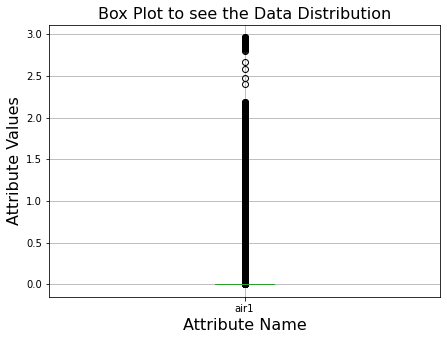

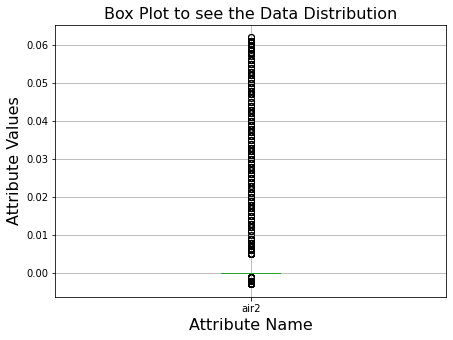

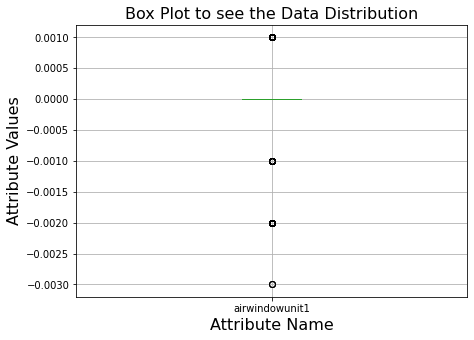

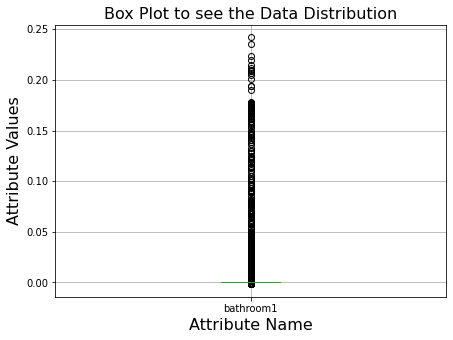

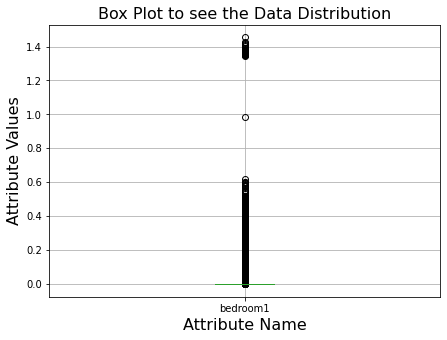

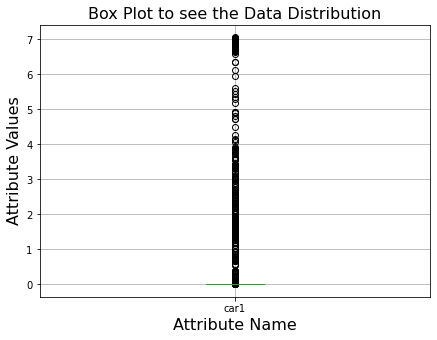

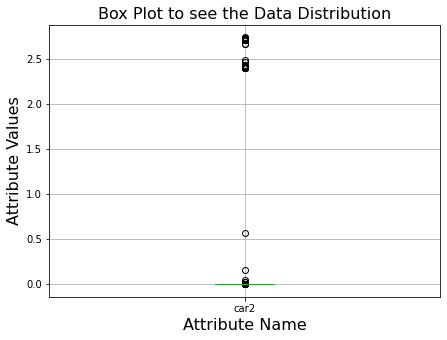

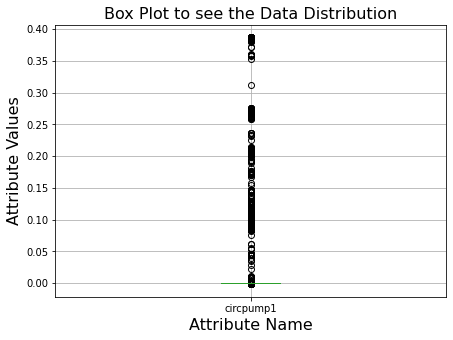

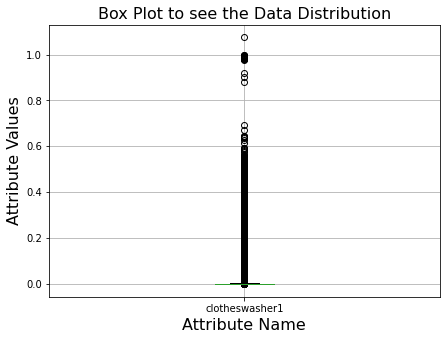

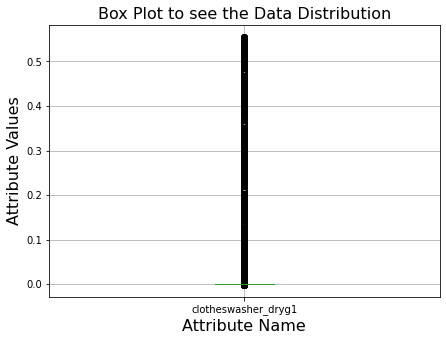

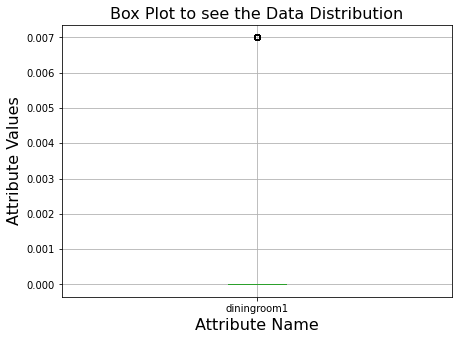

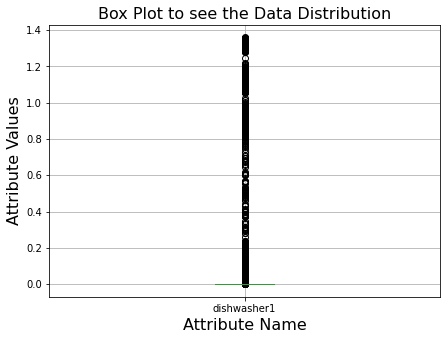

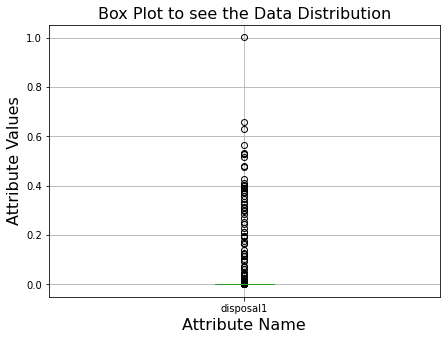

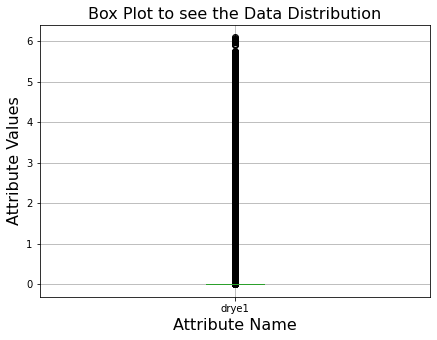

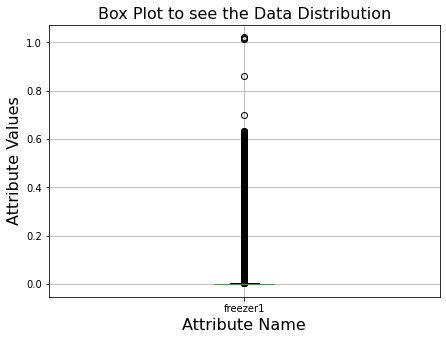

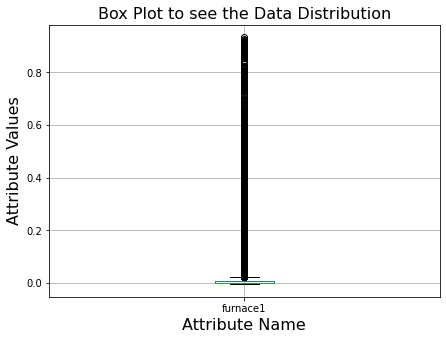

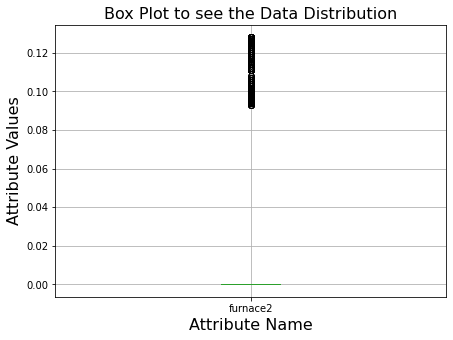

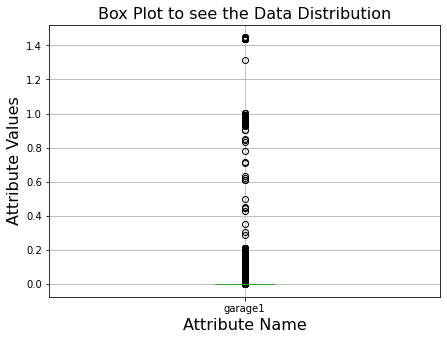

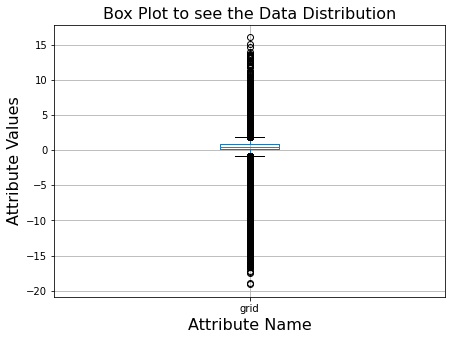

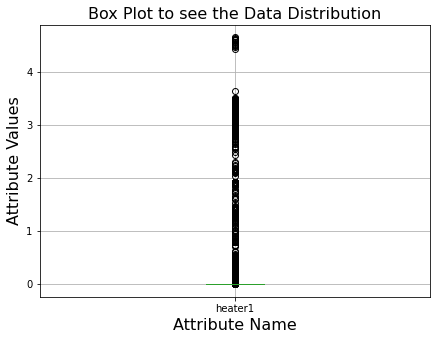

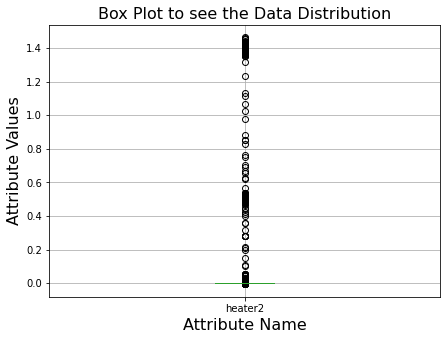

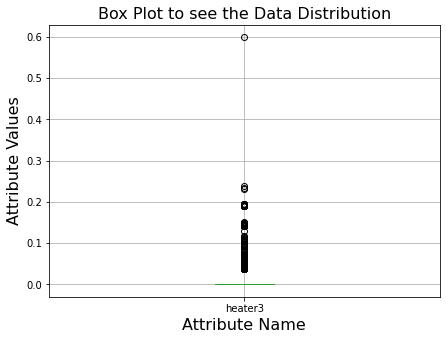

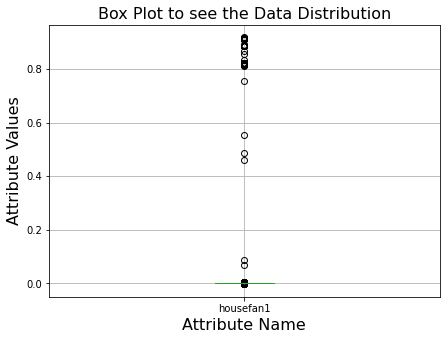

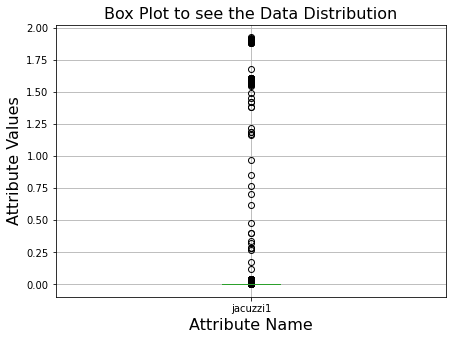

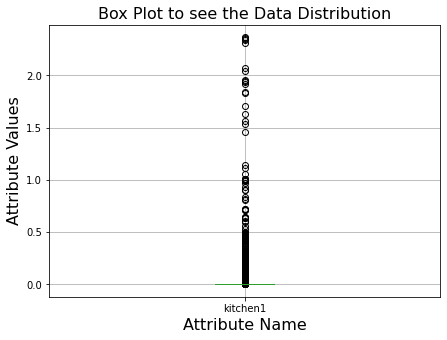

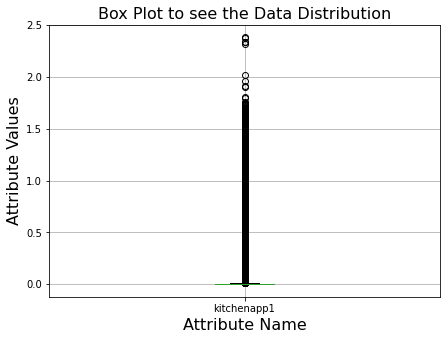

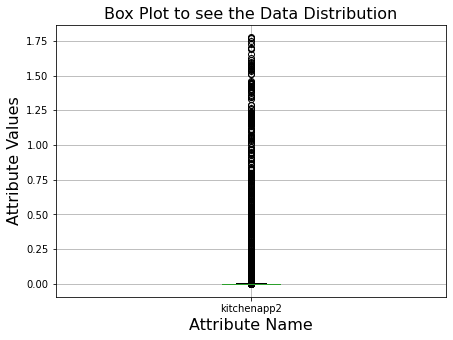

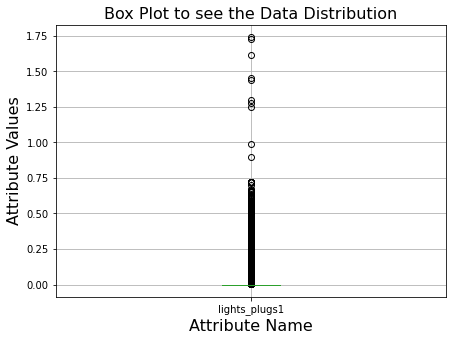

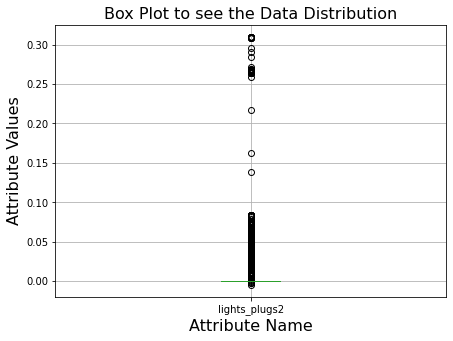

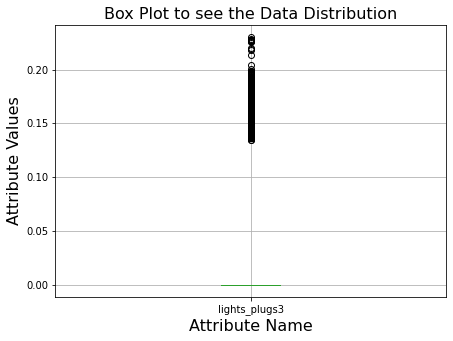

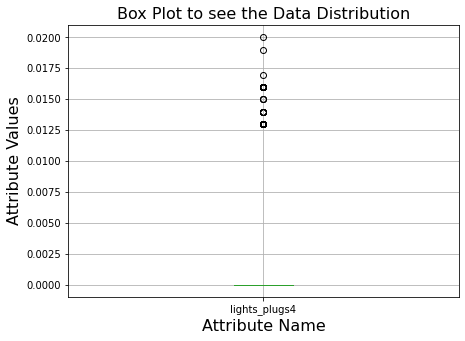

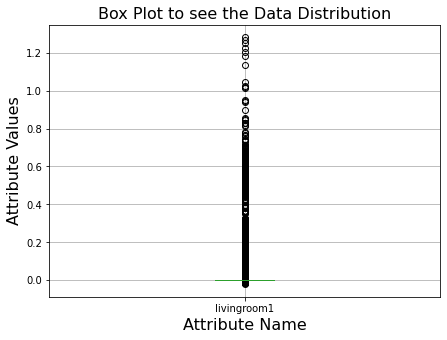

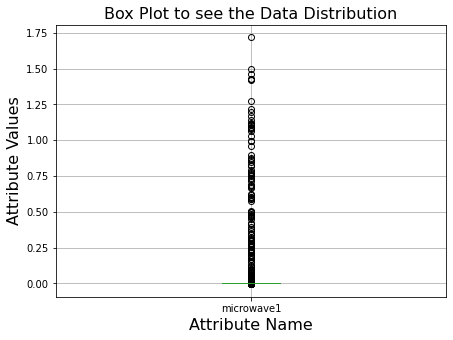

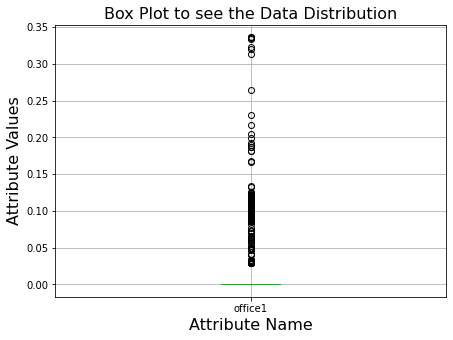

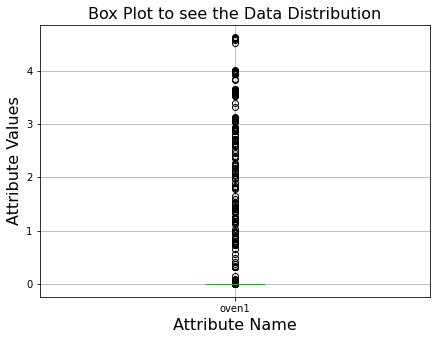

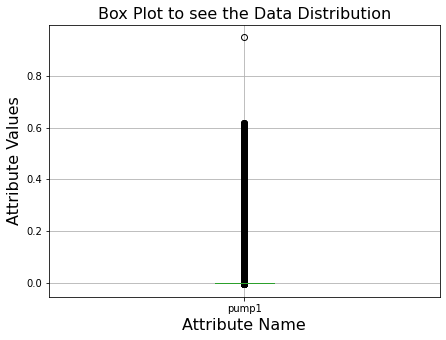

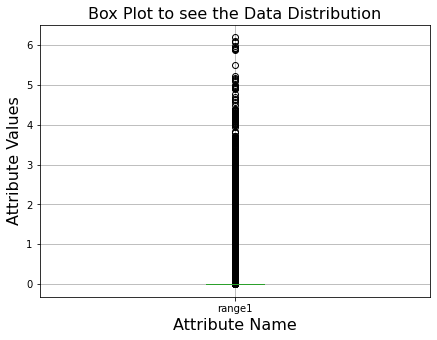

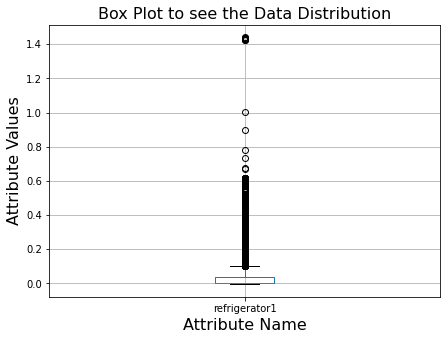

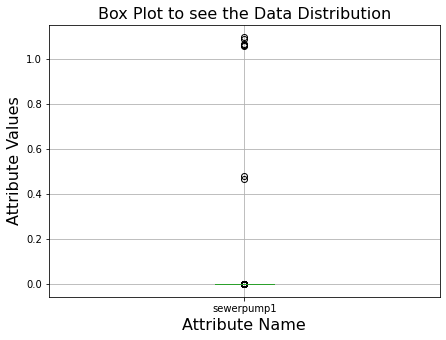

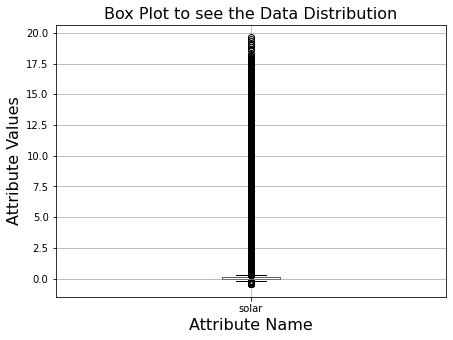

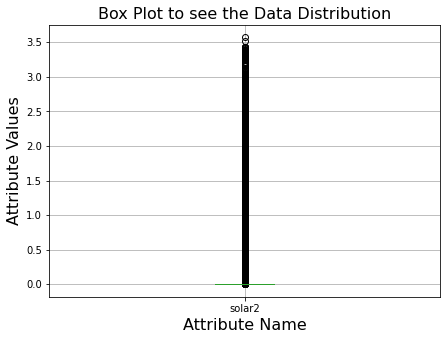

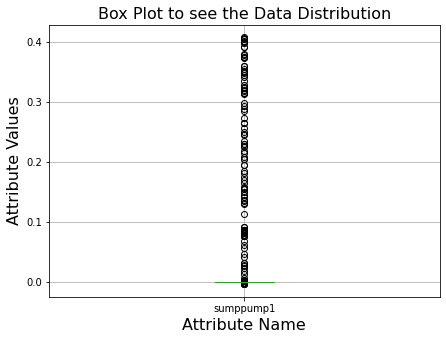

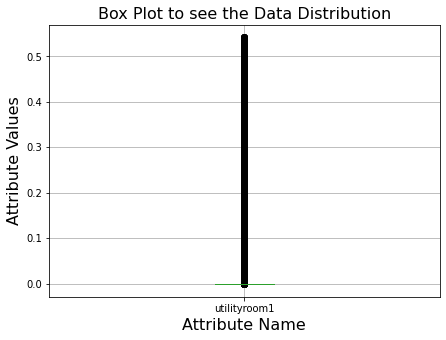

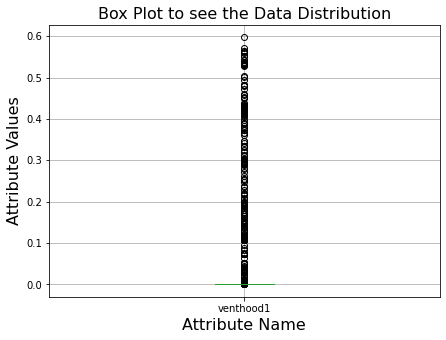

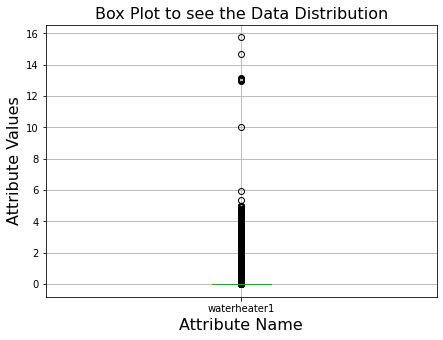

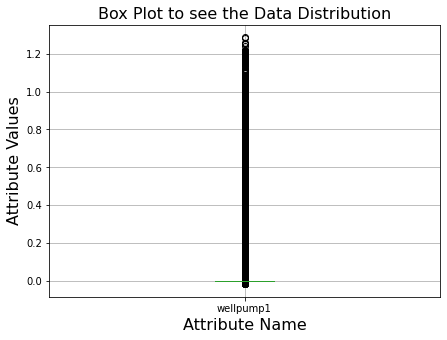

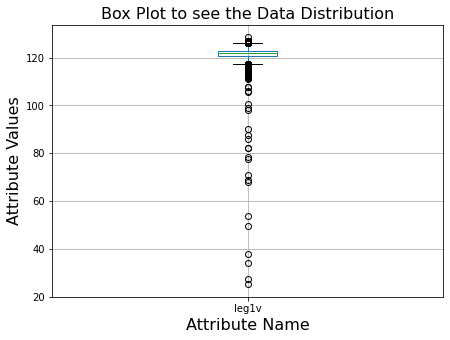

In [19]:
rcParams['figure.figsize'] = 7, 5
for column in choosed_segment:
    plt.figure()
    choosed_segment.boxplot([column])
    plt.xlabel('Attribute Name',fontsize=16)
    plt.ylabel('Attribute Values',fontsize=16)
    plt.title("Box Plot to see the Data Distribution",fontsize=16)
    plt.show()

## **Data Normalization**

In [20]:
# fit scaler on training data
norm = MinMaxScaler().fit(choosed_segment)
# transform training data
normal_choosed_segment = norm.transform(choosed_segment)
cols = choosed_segment.columns.values
# normalized data to dataframe
normal_choosed_segment = pd.DataFrame(data = normal_choosed_segment, columns = cols)
normal_choosed_segment.head(5)

,air1,air2,airwindowunit1,bathroom1,bedroom1,car1,car2,circpump1,clotheswasher1,clotheswasher_dryg1,diningroom1,dishwasher1,disposal1,drye1,freezer1,furnace1,furnace2,garage1,grid,heater1,heater2,heater3,housefan1,jacuzzi1,kitchen1,kitchenapp1,kitchenapp2,lights_plugs1,lights_plugs2,lights_plugs3,lights_plugs4,livingroom1,microwave1,office1,oven1,pump1,range1,refrigerator1,sewerpump1,solar,solar2,sumppump1,utilityroom1,venthood1,waterheater1,wellpump1,leg1v
0,0.001012,0.046154,0.75,0.008197,0.002059,0.000566,0.001093,0.005141,0.002783,0.001802,0.0,0.001468,0.0,0.001965,0.000978,0.026652,0.0,0.002069,0.551890,0.002145,0.004759,0.0,0.004334,0.00104,0.0,0.002935,0.065169,0.0,0.01278,0.0,0.0,0.020721,0.004632,0.0,0.002372,0.007322,0.001612,0.004149,0.000912,0.023289,0.000839,0.009732,0.003676,0.0,0.001649,0.013804,0.936622
1,0.001012,0.046154,0.75,0.008197,0.002059,0.000566,0.001093,0.005141,0.002783,0.001802,0.0,0.001468,0.0,0.001965,0.000978,0.026652,0.0,0.002069,0.551890,0.002145,0.004759,0.0,0.004334,0.00104,0.0,0.002935,0.065730,0.0,0.01278,0.0,0.0,0.021489,0.004632,0.0,0.002372,0.007322,0.001612,0.004149,0.000912,0.023289,0.000839,0.009732,0.003676,0.0,0.001649,0.013804,0.937241
2,0.001012,0.046154,0.75,0.008197,0.002059,0.000566,0.001093,0.005141,0.002783,0.001802,0.0,0.001468,0.0,0.001965,0.000978,0.026652,0.0,0.002069,0.551890,0.002145,0.004759,0.0,0.004334,0.00104,0.0,0.002935,0.065730,0.0,0.01278,0.0,0.0,0.021489,0.004632,0.0,0.002372,0.007322,0.001612,0.004149,0.000912,0.023289,0.000839,0.009732,0.003676,0.0,0.001649,0.013804,0.936060
3,0.001012,0.046154,0.75,0.008197,0.002059,0.000566,0.001093,0.005141,0.002783,0.001802,0.0,0.001468,0.0,0.001965,0.000978,0.026652,0.0,0.002069,0.551890,0.002145,0.004759,0.0,0.004334,0.00104,0.0,0.002935,0.065730,0.0,0.01278,0.0,0.0,0.020721,0.004632,0.0,0.002372,0.007322,0.001612,0.004149,0.000912,0.023289,0.000839,0.009732,0.003676,0.0,0.001649,0.013804,0.935828
4,0.001012,0.046154,0.75,0.008197,0.002059,0.000566,0.001093,0.005141,0.002783,0.001802,0.0,0.001468,0.0,0.001965,0.000978,0.026652,0.0,0.002069,0.551918,0.002145,0.004759,0.0,0.004334,0.00104,0.0,0.002935,0.065730,0.0,0.01278,0.0,0.0,0.020721,0.004632,0.0,0.002372,0.007322,0.001612,0.004149,0.000912,0.023289,0.000839,0.009732,0.003676,0.0,0.001649,0.013804,0.934589


## Describing the Normalized Data

In [21]:
normal_choosed_segment.describe()

,air1,air2,airwindowunit1,bathroom1,bedroom1,car1,car2,circpump1,clotheswasher1,clotheswasher_dryg1,diningroom1,dishwasher1,disposal1,drye1,freezer1,furnace1,furnace2,garage1,grid,heater1,heater2,heater3,housefan1,jacuzzi1,kitchen1,kitchenapp1,kitchenapp2,lights_plugs1,lights_plugs2,lights_plugs3,lights_plugs4,livingroom1,microwave1,office1,oven1,pump1,range1,refrigerator1,sewerpump1,solar,solar2,sumppump1,utilityroom1,venthood1,waterheater1,wellpump1,leg1v
count,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.00000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.00000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000
mean,0.023649,0.063723,0.752703,0.010780,0.004690,0.006475,0.002456,0.010788,0.004909,0.006888,0.04000,0.005465,0.000260,0.008782,0.023717,0.048491,0.030975,0.008996,0.553424,0.005106,0.008472,0.002986,0.004892,0.003952,0.002033,0.011736,0.008264,0.007746,0.019447,0.024943,0.026060,0.028407,0.005011,0.00450,0.003077,0.023918,0.004255,0.023142,0.000944,0.050001,0.005832,0.010572,0.034710,0.001405,0.006756,0.018798,0.934388
std,0.106096,0.118507,0.032259,0.028559,0.028675,0.059822,0.036618,0.040077,0.024122,0.057527,0.19596,0.050312,0.006293,0.062222,0.061180,0.133351,0.152175,0.055140,0.048932,0.035458,0.049301,0.015800,0.023312,0.050589,0.014884,0.038377,0.029266,0.030561,0.039344,0.122661,0.127704,0.044250,0.010376,0.02582,0.019125,0.088329,0.029253,0.037513,0.005824,0.078299,0.050255,0.017633,0.146965,0.022082,0.032339,0.052867,0.017940
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.001012,0.046154,0.750000,0.008197,0.002059,0.000566,0.001093,0.005141,0.002783,0.001802,0.00000,0.001468,0.000000,0.001965,0.000978,0.005330,0.000000,0.002069,0.548190,0.001287,0.004759,0.000000,0.004334,0.000000,0.000000,0.001258,0.002809,0.000000,0.012780,0.000000,0.000000,0.016884,0.004632,0.00000,0.002372,0.007322,0.001612,0.004149,0.000912,0.023289,0.000839,0.009732,0.003676,0.000000,0.001649,0.013804,0.924631
50%,0.001012,0.046154,0.750000,0.008197,0.002059,0.000566,0.001093,0.005141,0.002783,0.001802,0.00000,0.001468,0.000000,0.001965,0.000978,0.005330,0.000000,0.002069,0.554708,0.001287,0.004759,0.000000,0.004334,0.000000,0.000000,0.001677,0.002809,0.000000,0.012780,0.000000,0.000000,0.016884,0.004632,0.00000,0.002372,0.007322,0.001612,0.004149,0.000912,0.023289,0.000839,0.009732,0.003676,0.000000,0.001649,0.013804,0.937193
75%,0.001012,0.046154,0.750000,0.008197,0.002059,0.000566,0.001093,0.005141,0.003711,0.001802,0.00000,0.001468,0.000000,0.001965,0.002935,0.014925,0.000000,0.002759,0.566891,0.001502,0.004759,0.000000,0.004334,0.000000,0.000000,0.003354,0.003371,0.000000,0.012780,0.000000,0.000000,0.016884,0.004632,0.00000,0.002372,0.007322,0.001612,0.031812,0.000912,0.029112,0.000839,0.009732,0.003676,0.000000,0.001712,0.013804,0.945709
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000

## Plotting the Box plot of Normalized Data

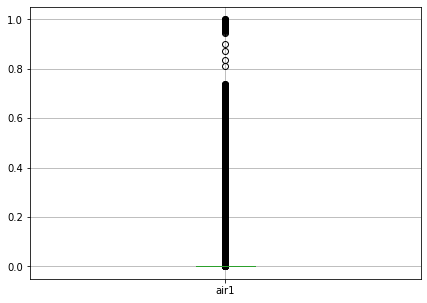

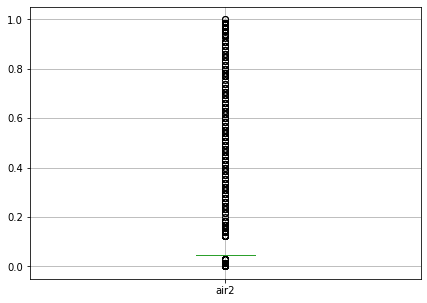

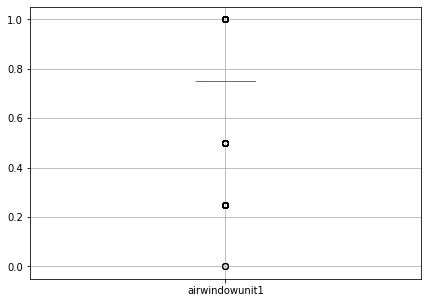

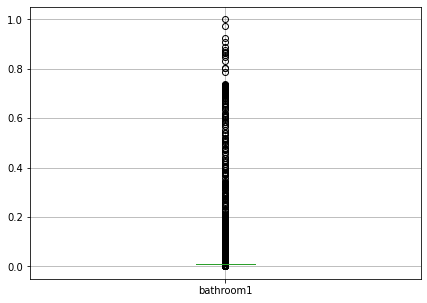

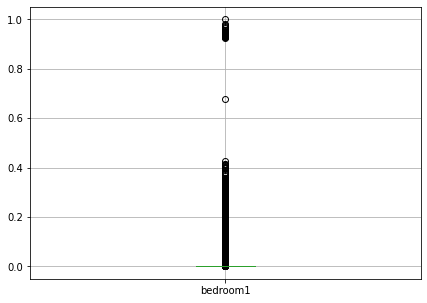

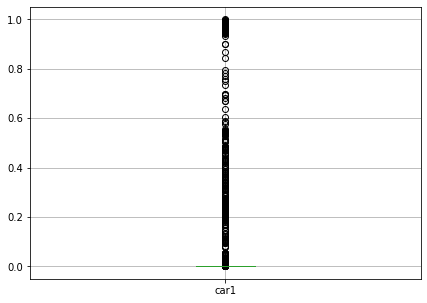

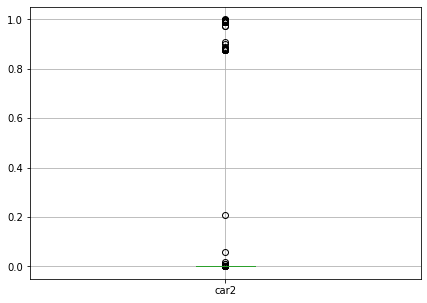

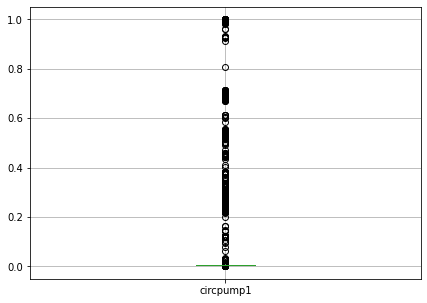

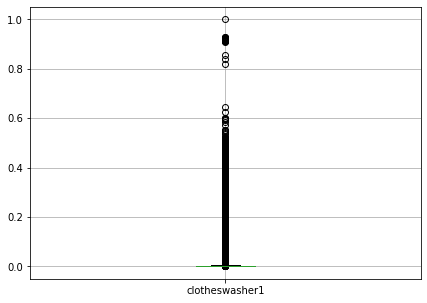

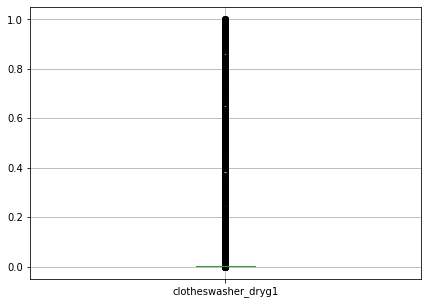

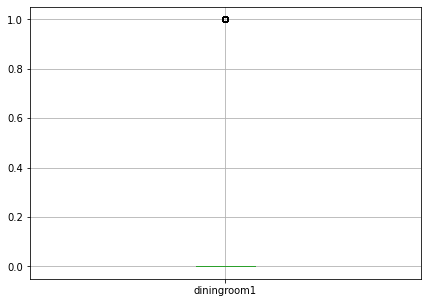

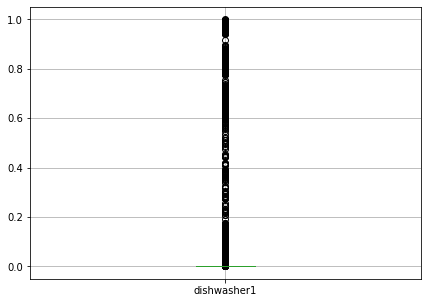

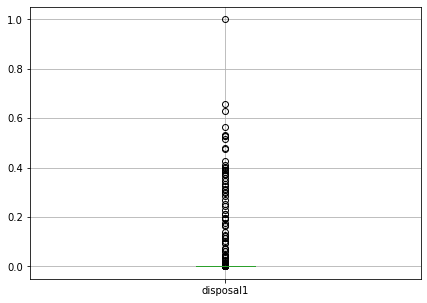

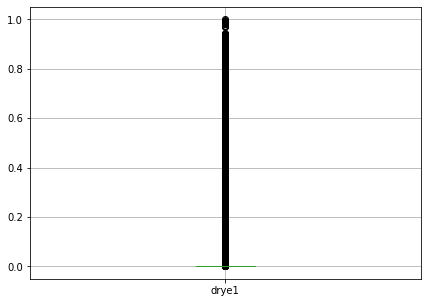

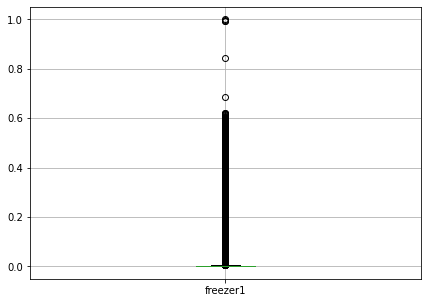

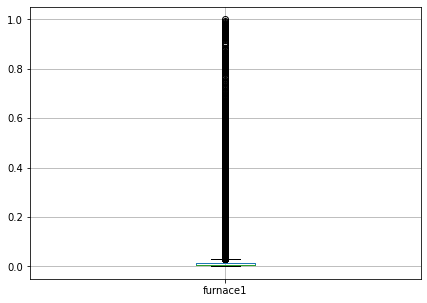

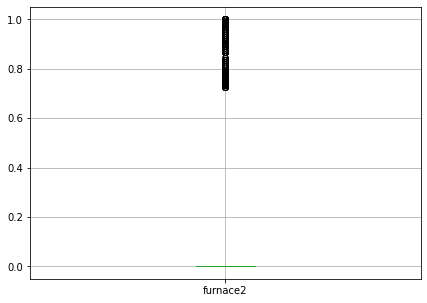

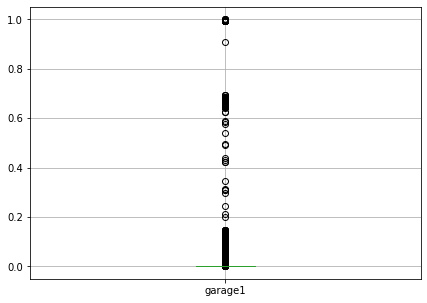

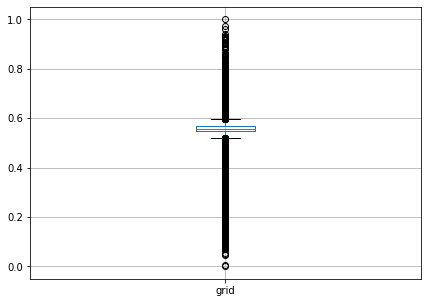

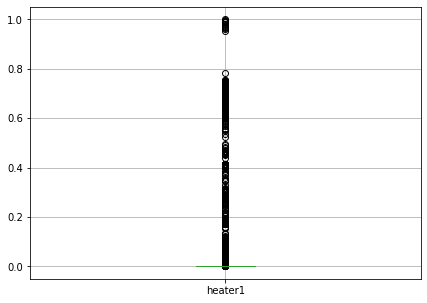

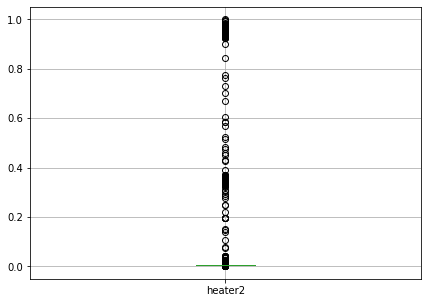

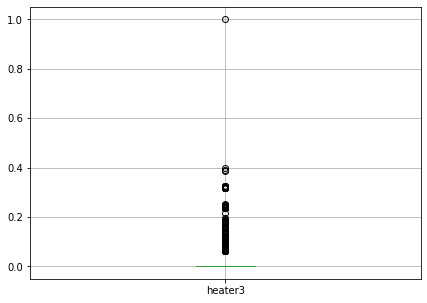

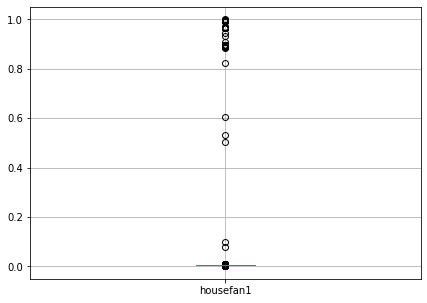

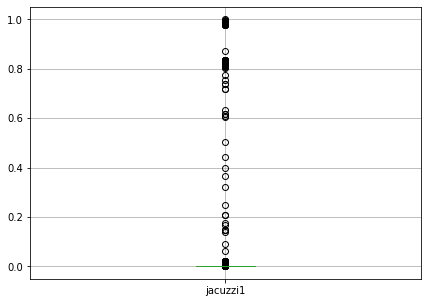

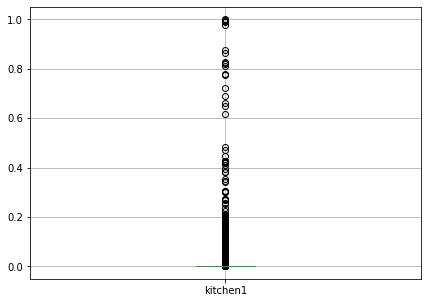

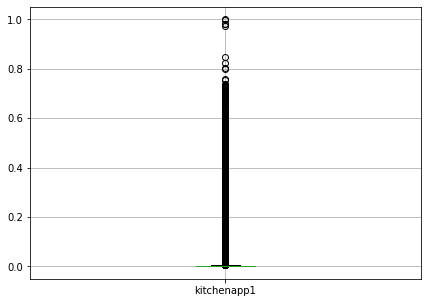

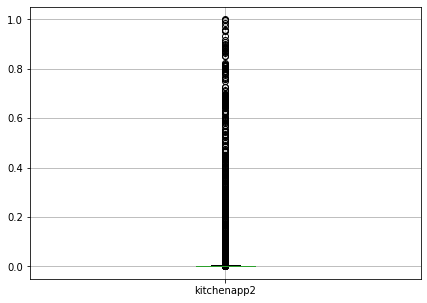

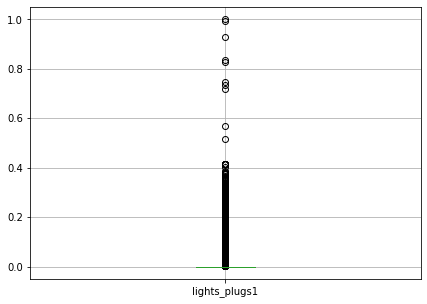

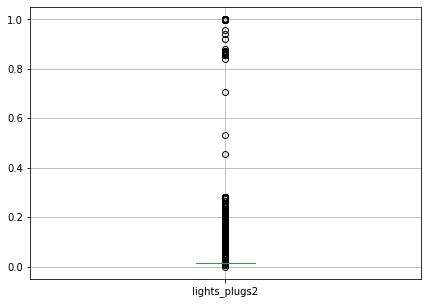

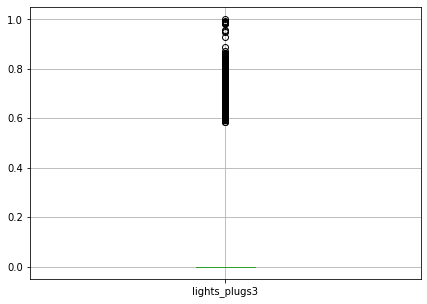

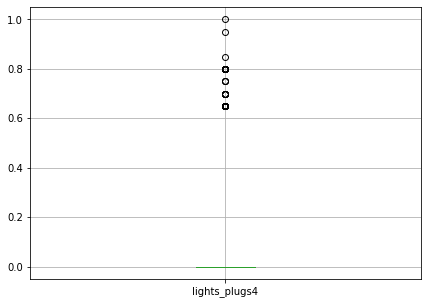

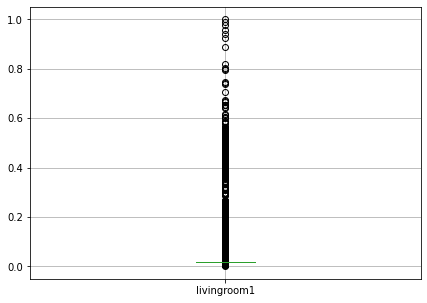

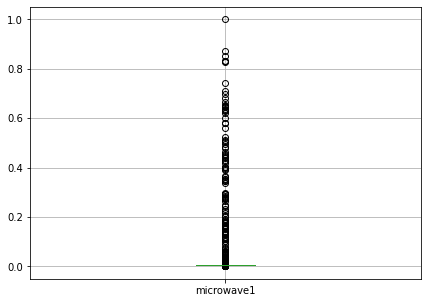

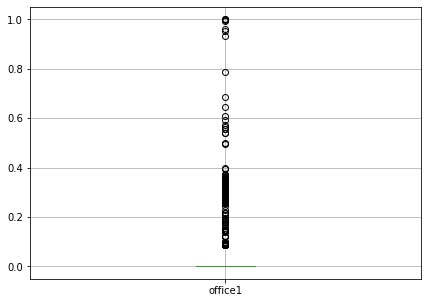

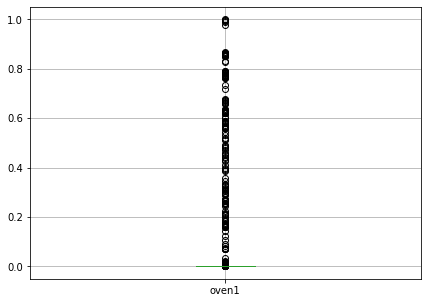

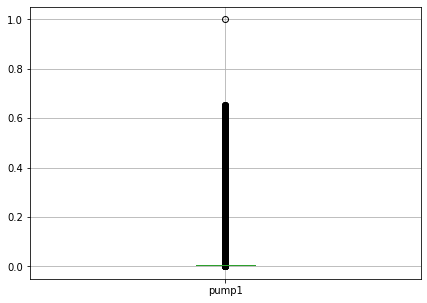

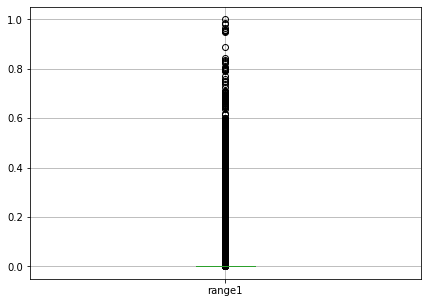

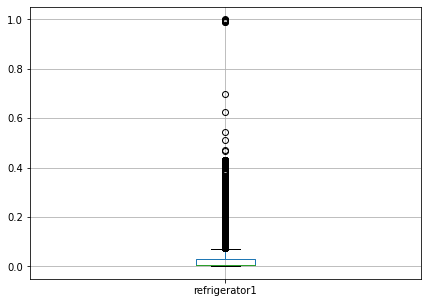

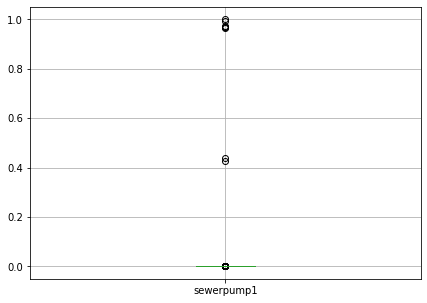

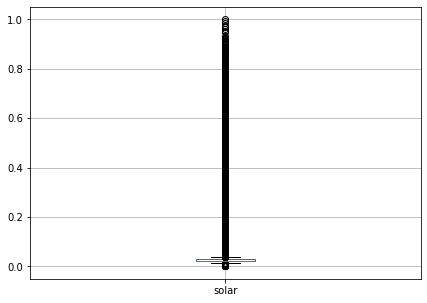

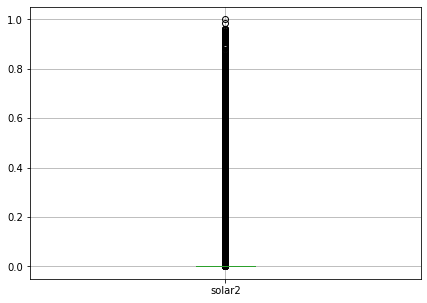

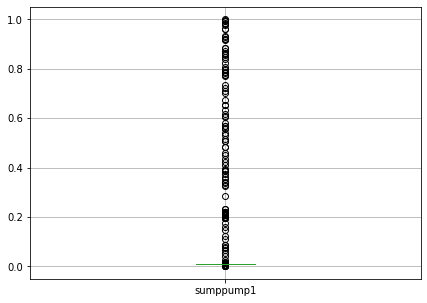

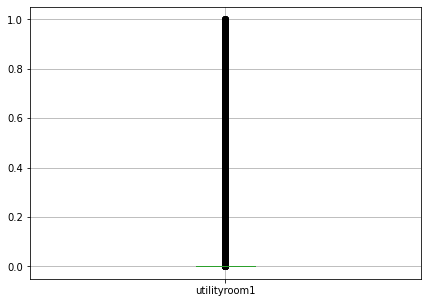

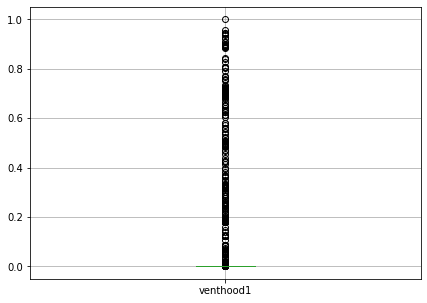

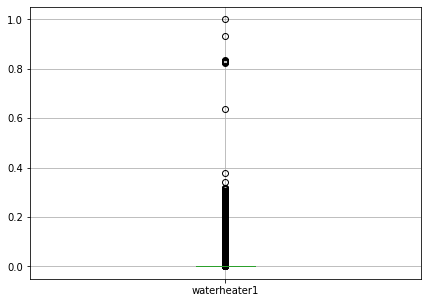

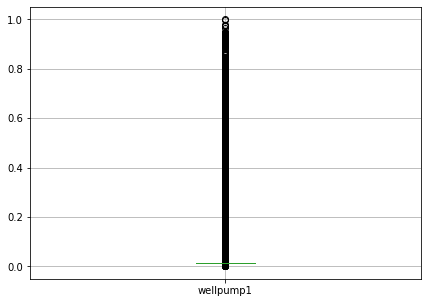

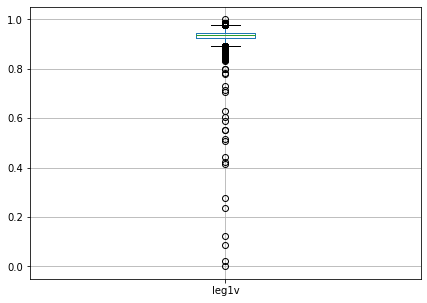

In [22]:
rcParams['figure.figsize'] = 7, 5
for column in normal_choosed_segment:
    plt.figure()
    normal_choosed_segment.boxplot([column])

# Comparing the Normal and Un-Normal Data

## Applying Linear Regression Model on the Un-Normal Data

In [23]:
# input to the model
X = choosed_segment[['air1', 'air2', 'airwindowunit1', 'bathroom1',
       'bedroom1', 'car1', 'car2', 'circpump1', 'clotheswasher1',
       'clotheswasher_dryg1', 'diningroom1', 'dishwasher1', 'disposal1',
       'drye1', 'freezer1', 'furnace1', 'furnace2', 'garage1', 'grid',
       'heater1', 'heater2', 'heater3', 'housefan1', 'jacuzzi1', 'kitchen1',
       'kitchenapp1', 'kitchenapp2', 'lights_plugs1', 'lights_plugs2',
       'lights_plugs3', 'lights_plugs4', 'livingroom1', 'microwave1',
       'office1', 'oven1', 'pump1', 'range1', 'refrigerator1', 'sewerpump1',
       'solar', 'solar2', 'sumppump1', 'utilityroom1', 'venthood1',
       'waterheater1', 'wellpump1']]
# target attribute
y = choosed_segment.leg1v
# train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=27)
# regression model
reg = LinearRegression().fit(X_train, y_train)
# prediction
pre  = reg.predict(X_test)
# eror computation
print("Mean Squared Error without Normalization: ",mean_squared_error(y_test, pre))

Mean Squared Error without Normalization:  2.3822692424450405


## Applying Linear Regression Model on Normal Data

In [24]:
X = normal_choosed_segment[['air1', 'air2', 'airwindowunit1', 'bathroom1',
       'bedroom1', 'car1', 'car2', 'circpump1', 'clotheswasher1',
       'clotheswasher_dryg1', 'diningroom1', 'dishwasher1', 'disposal1',
       'drye1', 'freezer1', 'furnace1', 'furnace2', 'garage1', 'grid',
       'heater1', 'heater2', 'heater3', 'housefan1', 'jacuzzi1', 'kitchen1',
       'kitchenapp1', 'kitchenapp2', 'lights_plugs1', 'lights_plugs2',
       'lights_plugs3', 'lights_plugs4', 'livingroom1', 'microwave1',
       'office1', 'oven1', 'pump1', 'range1', 'refrigerator1', 'sewerpump1',
       'solar', 'solar2', 'sumppump1', 'utilityroom1', 'venthood1',
       'waterheater1', 'wellpump1']]
y = normal_choosed_segment.leg1v
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=27)
reg = LinearRegression().fit(X_train, y_train)
pre  = reg.predict(X_test)
print("Mean Squared Error with Normalization: ",mean_squared_error(y_test, pre))

Mean Squared Error with Normalization:  0.000223111097751904


**It shows that when we applied the data normalization, the performace of the Model become better**

# **Feature Selection**

In [25]:
print("Shape of the Dataset before Feature Selection: ",normal_choosed_segment.shape)

Shape of the Dataset before Feature Selection:  (180000, 47)


In [26]:
selected = normal_choosed_segment.iloc[:,0:45]
selected_columns = selected.columns.values
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns

In [27]:
SL = 0.05
data_modeled, selected_column = backwardElimination(normal_choosed_segment.iloc[:,0:45].values, normal_choosed_segment.iloc[:,46].values, SL, selected_columns)
featured_data = pd.DataFrame(data = data_modeled, columns = selected_column)
featured_data['leg1v'] = normal_choosed_segment['leg1v']

In [28]:
print("Shape of the Dataset after Feature Selection: ",featured_data.shape)
featured_data.head(5)

Shape of the Dataset after Feature Selection:  (180000, 44)


,air1,air2,airwindowunit1,bathroom1,bedroom1,car1,car2,circpump1,clotheswasher1,clotheswasher_dryg1,diningroom1,dishwasher1,drye1,freezer1,furnace1,furnace2,garage1,grid,heater1,heater2,heater3,housefan1,jacuzzi1,kitchen1,kitchenapp1,kitchenapp2,lights_plugs1,lights_plugs2,lights_plugs3,lights_plugs4,livingroom1,office1,oven1,pump1,range1,refrigerator1,sewerpump1,solar,solar2,sumppump1,utilityroom1,venthood1,waterheater1,leg1v
0,0.001012,0.046154,0.75,0.008197,0.002059,0.000566,0.001093,0.005141,0.002783,0.001802,0.0,0.001468,0.001965,0.000978,0.026652,0.0,0.002069,0.551890,0.002145,0.004759,0.0,0.004334,0.00104,0.0,0.002935,0.065169,0.0,0.01278,0.0,0.0,0.020721,0.0,0.002372,0.007322,0.001612,0.004149,0.000912,0.023289,0.000839,0.009732,0.003676,0.0,0.001649,0.936622
1,0.001012,0.046154,0.75,0.008197,0.002059,0.000566,0.001093,0.005141,0.002783,0.001802,0.0,0.001468,0.001965,0.000978,0.026652,0.0,0.002069,0.551890,0.002145,0.004759,0.0,0.004334,0.00104,0.0,0.002935,0.065730,0.0,0.01278,0.0,0.0,0.021489,0.0,0.002372,0.007322,0.001612,0.004149,0.000912,0.023289,0.000839,0.009732,0.003676,0.0,0.001649,0.937241
2,0.001012,0.046154,0.75,0.008197,0.002059,0.000566,0.001093,0.005141,0.002783,0.001802,0.0,0.001468,0.001965,0.000978,0.026652,0.0,0.002069,0.551890,0.002145,0.004759,0.0,0.004334,0.00104,0.0,0.002935,0.065730,0.0,0.01278,0.0,0.0,0.021489,0.0,0.002372,0.007322,0.001612,0.004149,0.000912,0.023289,0.000839,0.009732,0.003676,0.0,0.001649,0.936060
3,0.001012,0.046154,0.75,0.008197,0.002059,0.000566,0.001093,0.005141,0.002783,0.001802,0.0,0.001468,0.001965,0.000978,0.026652,0.0,0.002069,0.551890,0.002145,0.004759,0.0,0.004334,0.00104,0.0,0.002935,0.065730,0.0,0.01278,0.0,0.0,0.020721,0.0,0.002372,0.007322,0.001612,0.004149,0.000912,0.023289,0.000839,0.009732,0.003676,0.0,0.001649,0.935828
4,0.001012,0.046154,0.75,0.008197,0.002059,0.000566,0.001093,0.005141,0.002783,0.001802,0.0,0.001468,0.001965,0.000978,0.026652,0.0,0.002069,0.551918,0.002145,0.004759,0.0,0.004334,0.00104,0.0,0.002935,0.065730,0.0,0.01278,0.0,0.0,0.020721,0.0,0.002372,0.007322,0.001612,0.004149,0.000912,0.023289,0.000839,0.009732,0.003676,0.0,0.001649,0.934589


# **Energy Consumption per User**

In [29]:
featured_data['dataid'] = combined_Data['dataid']
sum_ny_minute_data = featured_data.groupby(['dataid']).sum()
sum_ny_minute_data
sum_ny_minute_data = sum_ny_minute_data.round(2)
sum_ny_minute_data.head(5)

,air1,air2,airwindowunit1,bathroom1,bedroom1,car1,car2,circpump1,clotheswasher1,clotheswasher_dryg1,diningroom1,dishwasher1,drye1,freezer1,furnace1,furnace2,garage1,grid,heater1,heater2,heater3,housefan1,jacuzzi1,kitchen1,kitchenapp1,kitchenapp2,lights_plugs1,lights_plugs2,lights_plugs3,lights_plugs4,livingroom1,office1,oven1,pump1,range1,refrigerator1,sewerpump1,solar,solar2,sumppump1,utilityroom1,venthood1,waterheater1,leg1v
dataid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
27,184.45,3533.31,5400.0,59.02,14.82,273.00,7.87,37.02,20.04,751.12,0.0,10.57,14.15,1371.58,38.38,0.0,23.15,3778.50,9.27,34.26,0.0,31.2,0.0,0.00,183.58,45.99,0.00,92.01,0.0,0.0,121.57,0.0,17.08,52.72,11.61,29.88,6.56,738.26,6.04,70.07,26.47,0.0,44.58,6434.59
142,7.28,332.31,5400.0,59.02,14.82,4.08,7.87,37.02,20.04,81.88,0.0,83.52,14.15,588.21,38.38,0.0,14.90,3858.98,36.44,34.26,0.0,31.2,0.0,0.00,50.73,27.18,667.25,723.08,0.0,0.0,121.57,0.0,28.86,52.72,11.61,326.75,6.56,445.11,6.04,70.07,26.47,0.0,11.87,6783.58
387,7.28,332.31,5400.0,59.02,14.82,4.08,7.87,37.02,26.27,12.97,0.0,10.57,14.15,7.05,38.38,0.0,14.90,3903.80,70.73,34.26,0.0,31.2,0.0,0.00,42.78,31.15,0.00,92.01,0.0,0.0,121.57,0.0,74.86,52.72,11.61,307.83,6.56,334.25,6.04,70.07,1288.01,0.0,11.87,6823.76
558,182.53,332.31,5400.0,59.02,14.82,4.08,7.87,37.02,38.24,12.97,0.0,10.57,63.95,565.58,164.83,0.0,14.90,4048.76,9.27,34.26,0.0,31.2,0.0,273.62,25.62,55.27,0.00,92.01,0.0,0.0,121.57,0.0,17.08,52.72,37.24,29.88,6.56,167.68,6.04,70.07,26.47,0.0,11.87,6662.87
914,7.28,332.31,5400.0,59.02,14.82,4.08,7.87,37.02,38.15,12.97,0.0,10.57,29.18,7.05,38.38,0.0,20.17,3896.59,9.27,34.26,0.0,31.2,0.0,0.00,9.06,20.22,0.00,92.01,0.0,0.0,121.57,0.0,44.99,52.72,37.98,29.88,6.56,574.01,6.04,70.07,26.47,0.0,11.87,6849.07


# **K-Means Clustering**

## Finding the best number of Clusters

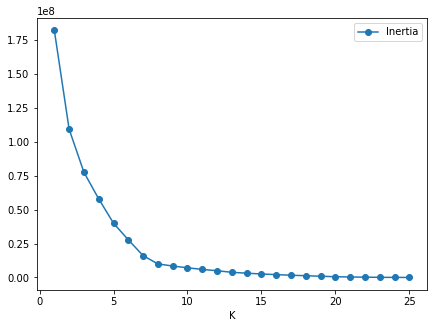

In [30]:
import sklearn.cluster
import numpy as np
km = sklearn.cluster.KMeans()
def kmerror(k): 
    km.n_clusters = k   
    km.fit_predict(sum_ny_minute_data)
    return km.inertia_ 
elbow = pd.DataFrame(list(range(1,len(sum_ny_minute_data)+1)), columns=['K'])
elbow['Inertia'] = elbow.K.map(kmerror)
elbow.plot.line(x='K', y='Inertia', marker='o')

## Applying K-Means Clusters

In [31]:
import sklearn.cluster
#applying k-means and assigning cluster to each dataid
km1 = sklearn.cluster.KMeans()
labels = km1.fit_predict(sum_ny_minute_data)
labels_df = pd.DataFrame(labels, columns=['cluster'])
labels_df.index = sum_ny_minute_data.index
dataid1 = sum_ny_minute_data.join(labels_df)
print("Users per Cluster :",dataid1.iloc[:,-1])

Users per Cluster : dataid
27      5
142     0
387     0
558     0
914     0
950     2
1222    0
1240    1
1417    0
2096    4
2318    0
2358    0
3000    0
3488    7
3517    0
3700    0
3996    6
4283    0
4550    0
5058    0
5587    7
5679    0
5982    0
5997    3
9053    0
Name: cluster, dtype: int32


# **Multi-dimensional signature (appliance energy consumption) for each dataid**

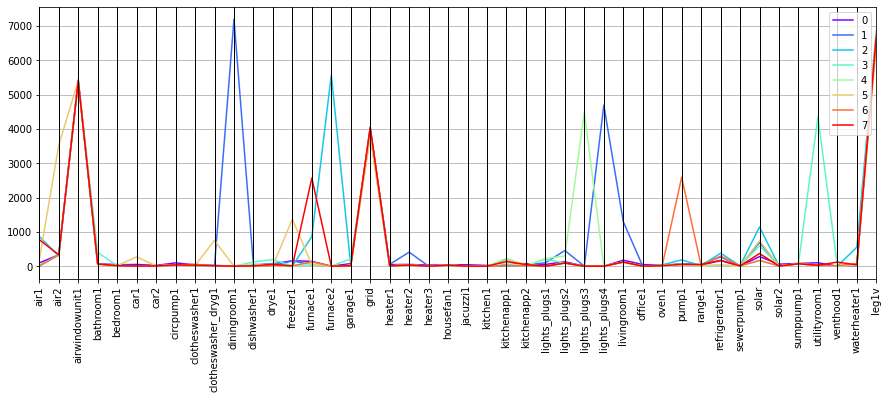

In [32]:
snorm = dataid1.copy() 
sg = snorm.groupby('cluster')
scentroids = sg.mean()
scentroids['cluster'] = scentroids.index
splot = pd.plotting.parallel_coordinates(scentroids, 'cluster', colormap=pyplot.cm.rainbow)
splot.set_xticklabels(scentroids.columns[:-1], rotation='vertical')
splot.figure.set_size_inches(15, 5, forward=True)

# **Computing 2D Manhattan distance between dataid pairs**

In [33]:
normHD = pairs.manhattan_distances(sum_ny_minute_data.iloc[:,:-1])
normDist = pd.DataFrame(normHD, columns=sum_ny_minute_data.index, index=sum_ny_minute_data.index)
normDist.head(5)

dataid,27,142,387,558,914,950,1222,1240,1417,2096,2318,2358,3000,3488,3517,3700,3996,4283,4550,5058,5587,5679,5982,5997,9053
dataid,,,,,,,,,,,,,,,,,,,,,,,,,
27,0.00,7373.04,8140.64,6558.73,6355.51,14489.66,7037.82,20345.17,7153.70,11680.32,8669.60,7144.26,7726.14,10327.95,7001.47,7291.50,9796.56,8300.99,7794.35,8437.47,9322.84,7051.87,8388.18,11382.10,7172.77
142,7373.04,0.00,3555.92,2987.99,2641.43,10939.24,3461.32,15430.55,2605.06,6845.88,4721.82,2717.66,4594.44,6260.59,3758.29,2741.54,5370.62,4305.17,3681.63,4341.79,5983.62,4305.01,3724.72,7542.12,2822.09
387,8140.64,3555.92,0.00,3232.79,1980.99,10405.84,2778.50,15999.33,3281.92,6987.76,3788.92,1853.34,4877.44,5403.55,3828.07,1886.90,4506.36,3594.71,2967.73,3551.55,5340.20,3583.25,3036.20,5040.00,2106.01
558,6558.73,2987.99,3232.79,0.00,1812.74,10152.27,2628.39,15927.72,1286.75,6353.73,2794.87,1674.97,3103.17,4764.00,2256.18,1609.93,4075.51,2715.20,1918.94,3533.14,4426.61,2665.32,2691.89,7378.81,1828.46
914,6355.51,2641.43,1980.99,1812.74,0.00,9038.65,1268.09,14711.56,2391.99,5686.23,2438.47,904.71,3614.69,4630.98,2491.30,1092.25,3628.43,2260.24,1672.38,2387.18,3790.85,2169.92,2231.57,5726.03,1206.26


# **Using MDS to convert into 2D data**

In [34]:
mds = mani.MDS(dissimilarity='precomputed', n_init=10, max_iter=10)
data2D = mds.fit_transform(normDist)
data2D = pd.DataFrame(data2D, columns=['x','y'], index=sum_ny_minute_data.index)
data2D['CID'] = dataid1.cluster
data2D['dataid'] = data2D.index
data2D = data2D.reset_index(drop=True)
data2D.head(5)

,x,y,CID,dataid
0,-4582.876267,5730.640676,5,27
1,3082.081597,-452.081518,0,142
2,1744.287901,1906.765925,0,387
3,-455.548225,14.155040,0,558
4,499.849445,705.648199,0,914


# **Plotting the Results**

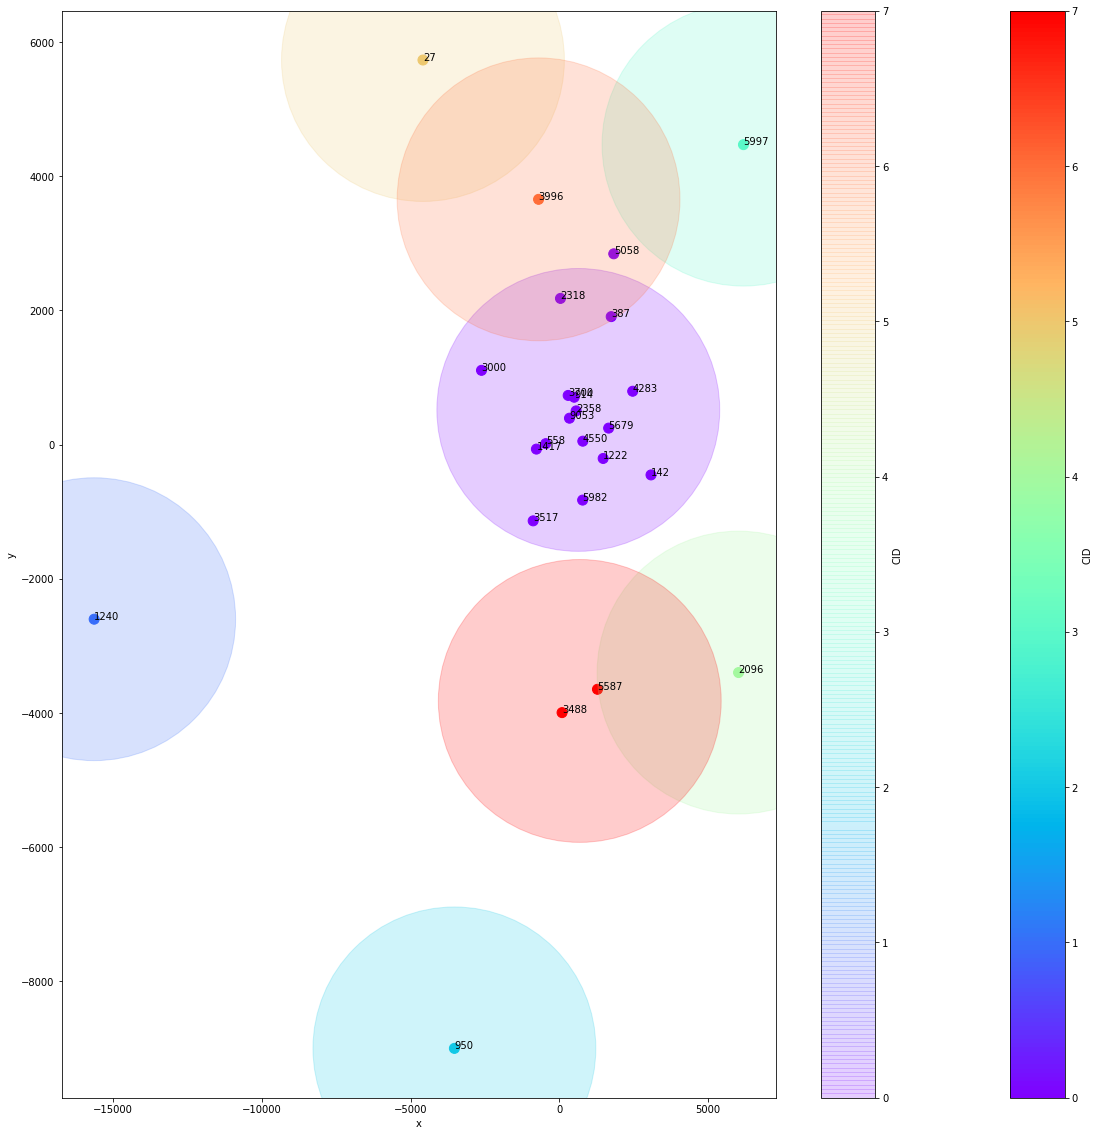

In [35]:
%matplotlib inline
ax = data2D.plot.scatter(x='x', y='y', c='CID', cmap=pyplot.cm.rainbow, s=100, figsize=(20,20), sharex=False)
for i in range(len(data2D)):
    ax.text(data2D.x[i], data2D.y[i], data2D.dataid[i])

g = data2D.groupby('CID')
centroids = g.mean()
centroids['CID'] = centroids.index
centroids
centroids.plot.scatter(x='x', y='y', c='CID', cmap=pyplot.cm.rainbow, s=80000, alpha=0.2, ax=ax)

# **Metadata**

In [36]:
sum_ny_dataid = sum_ny_minute_data.index.values
a = sum_ny_dataid.astype(str)
a

array(['27', '142', '387', '558', '914', '950', '1222', '1240', '1417',
       '2096', '2318', '2358', '3000', '3488', '3517', '3700', '3996',
       '4283', '4550', '5058', '5587', '5679', '5982', '5997', '9053'],
      dtype='<U21')

In [37]:
metadata = pd.read_csv("metadata.csv")
metadata

,dataid,active_record,building_type,city,state,egauge_1min_min_time,egauge_1min_max_time,egauge_1min_data_availability,egauge_1s_min_time,egauge_1s_max_time,egauge_1s_data_availability,air1,air2,air3,airwindowunit1,aquarium1,bathroom1,bathroom2,bedroom1,bedroom2,bedroom3,bedroom4,bedroom5,battery1,car1,car2,circpump1,clotheswasher1,clotheswasher_dryg1,diningroom1,diningroom2,dishwasher1,disposal1,drye1,dryg1,freezer1,furnace1,furnace2,garage1,garage2,...,water_ert_max_time,water_data_availability,gas_ert_min_time,gas_ert_max_time,gas_data_availability,indoor_temp_min_time,indoor_temp_max_time,indoor_temp_data_availability,date_enrolled,date_withdrawn,house_construction_year,total_square_footage,first_floor_square_footage,second_floor_square_footage,third_floor_square_footage,half_floor_square_footage,lower_level_square_footage,pv,pv_panel_direction,total_amount_of_pv,amount_of_south_facing_pv,amount_of_west_facing_pv,amount_of_east_facing_pv,number_of_nests,audit_2011,audit_2013_2014,survey_2011,survey_2012,survey_2013,survey_2014,survey_2017,survey_2019,program_579,program_baseline,program_energy_internet_demo,program_lg_appliance,program_verizon,program_ccet_group,program_civita_group,program_shines
0,The unique identifier for the home. To be more...,this field will show yes if this participant i...,This field will read Single-Family Home if thi...,participant's city,participant's state,"If eGauge electricity data is present, this fi...","If eGauge electricity data is present, this fi...",This field shows how much one minute data is ...,If eGauge electricity data is present in one s...,If eGauge electricity data is present in one s...,This field shows how much one second data is ...,Air compressor circuit eGauge data present.,Second air compressor circuit eGauge data pres...,Third air compressor circuit eGauge data present.,Window unit air conditioner circuit eGauge dat...,Aquarium circuit eGauge data present.,First bathroom circuit eGauge data present. Th...,Second bathroom circuit eGauge data present. T...,First bedroom circuit eGauge data present. Thi...,Second bedroom circuit eGauge data present. Th...,Third bedroom circuit eGauge data present. Thi...,Fourth bedroom circuit eGauge data present. Th...,Fifth bedroom circuit eGauge data present. Thi...,Whole home battery with a dedicated circuit eG...,Electric vehicle charger eGauge data present f...,Electric vehicle charger eGauge data present f...,eGauge data present for a pump used to circula...,Stand-alone clothes washing machine eGauge dat...,Clothes washing machine and natural gas-powere...,Dining room circuit eGauge data present. This ...,Additional dining room circuit eGauge data pre...,Dishwasher circuit eGauge data present.,Kitchen sink garbage disposal circuit eGauge d...,Electricity -powered clothes dryer (240V circu...,Natural gas-powered clothes dryer (120V circui...,Stand-alone freezer circuit eGauge data present.,Furnace and air handler circuit eGauge data pr...,Second furnace and air handler eGauge data pre...,Garage circuit eGauge data present. This type ...,Additional garage circuit eGauge data present....,...,"If ERT water data is present, this field will ...",This field shows how much water data is availa...,"If ERT gas data is present, this field will sh...","If ERT gas data is present, this field will sh...",This field shows how much gas data is availabl...,"If indoor temperature sensor data is present, ...","If indoor temperature sensor data is present, ...",This field shows how much indoor temperature d...,The date on which this participant enrolled wi...,The date on which this participant withdrew fr...,The year in which this home was constructed.,The total square footage of the home.,The square footage of the first floor of the h...,The square footage of the second floor of the ...,The square footage of the third floor of the h...,The square footage of a half floor in the home...,The square footage of a lower level floor in t...,This field will sh

In [38]:
ny_metadata = metadata[metadata['state'].str.contains('New York')]
ny_metadata

,dataid,active_record,building_type,city,state,egauge_1min_min_time,egauge_1min_max_time,egauge_1min_data_availability,egauge_1s_min_time,egauge_1s_max_time,egauge_1s_data_availability,air1,air2,air3,airwindowunit1,aquarium1,bathroom1,bathroom2,bedroom1,bedroom2,bedroom3,bedroom4,bedroom5,battery1,car1,car2,circpump1,clotheswasher1,clotheswasher_dryg1,diningroom1,diningroom2,dishwasher1,disposal1,drye1,dryg1,freezer1,furnace1,furnace2,garage1,garage2,...,water_ert_max_time,water_data_availability,gas_ert_min_time,gas_ert_max_time,gas_data_availability,indoor_temp_min_time,indoor_temp_max_time,indoor_temp_data_availability,date_enrolled,date_withdrawn,house_construction_year,total_square_footage,first_floor_square_footage,second_floor_square_footage,third_floor_square_footage,half_floor_square_footage,lower_level_square_footage,pv,pv_panel_direction,total_amount_of_pv,amount_of_south_facing_pv,amount_of_west_facing_pv,amount_of_east_facing_pv,number_of_nests,audit_2011,audit_2013_2014,survey_2011,survey_2012,survey_2013,survey_2014,survey_2017,survey_2019,program_579,program_baseline,program_energy_internet_demo,program_lg_appliance,program_verizon,program_ccet_group,program_civita_group,program_shines
62,4431,NaN,Single-Family Home 001 (Master),Ithaca,New York,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-27,2020-04-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,1925,yes,Single-Family Home 001 (Master),Dryden,New York,2019-09-25 19:00:00-05:00,2020-06-03 23:59:00-05:00,66%,2019-09-25 19:00:00-05:00,2020-06-03 23:00:00-05:00,63%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73,914,yes,Single-Family Home 001 (Master),Ithaca,New York,2019-02-15 18:00:00-06:00,2020-02-19 06:59:00-06:00,100%,2019-02-15 18:00:00-06:00,2020-02-19 05:00:00-06:00,100%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,yes,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-11-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
231,2358,yes,Single-Family Home 001 (Master),Brooktondale,New York,2019-03-06 18:00:00-06:00,2020-08-17 20:59:00-05:00,100%,2019-03-06 18:00:00-06:00,2020-08-17 20:00:00-05:00,100%,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,yes,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-02-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
316,4283,yes,Single-Family Home 001 (Master),Ithaca,New York,2019-02-21 12:00:00-06:00,2020-07-17 07:59:00-05:00,100%,2019-02-21 12:00:00-06:00,2020-07-17 07:00:00-05:00,100%,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,yes,NaN,NaN,NaN,yes,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1680,10089,yes,Single-Family Home 001 (Master),Ithaca,New York,2019-07-01 19:00:00-05:00,2020-08-30 02:59:00-05:00,100%,2019-07-01 19:00:00-05:00,2020-08-30 02:00:00-05:00,100%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [39]:
filter_ny_metadata = ny_metadata[ny_metadata['dataid'].isin(a)]
filter_ny_metadata['dataid'] = filter_ny_metadata['dataid'].astype(int)
filter_ny_metadata.index = filter_ny_metadata['dataid']
filter_ny_metadata = filter_ny_metadata.drop(['dataid'], axis=1)
filter_ny_metadata = filter_ny_metadata.sort_index()
filter_ny_metadata

,active_record,building_type,city,state,egauge_1min_min_time,egauge_1min_max_time,egauge_1min_data_availability,egauge_1s_min_time,egauge_1s_max_time,egauge_1s_data_availability,air1,air2,air3,airwindowunit1,aquarium1,bathroom1,bathroom2,bedroom1,bedroom2,bedroom3,bedroom4,bedroom5,battery1,car1,car2,circpump1,clotheswasher1,clotheswasher_dryg1,diningroom1,diningroom2,dishwasher1,disposal1,drye1,dryg1,freezer1,furnace1,furnace2,garage1,garage2,grid,...,water_ert_max_time,water_data_availability,gas_ert_min_time,gas_ert_max_time,gas_data_availability,indoor_temp_min_time,indoor_temp_max_time,indoor_temp_data_availability,date_enrolled,date_withdrawn,house_construction_year,total_square_footage,first_floor_square_footage,second_floor_square_footage,third_floor_square_footage,half_floor_square_footage,lower_level_square_footage,pv,pv_panel_direction,total_amount_of_pv,amount_of_south_facing_pv,amount_of_west_facing_pv,amount_of_east_facing_pv,number_of_nests,audit_2011,audit_2013_2014,survey_2011,survey_2012,survey_2013,survey_2014,survey_2017,survey_2019,program_579,program_baseline,program_energy_internet_demo,program_lg_appliance,program_verizon,program_ccet_group,program_civita_group,program_shines
dataid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
27,yes,Single-Family Home 001 (Master),Brooktondale,New York,2019-03-06 07:00:00-06:00,2020-08-30 02:59:00-05:00,100%,2019-03-06 08:00:00-06:00,2020-08-30 02:00:00-05:00,100%,yes,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN,yes,NaN,yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-11-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
142,yes,Single-Family Home 001 (Master),Trumansburg,New York,2019-03-14 19:00:00-05:00,2020-08-30 02:59:00-05:00,100%,2019-03-14 19:00:00-05:00,2020-08-30 02:00:00-05:00,100%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN,yes,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-02-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
387,yes,Single-Family Home 001 (Master),Ithaca,New York,2019-02-15 18:00:00-06:00,2020-08-30 02:59:00-05:00,100%,2019-02-15 18:00:00-06:00,2020-08-30 02:00:00-05:00,100%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
558,yes,Single-Family Home 001 (Master),Ithaca,New York,2019-02-15 18:00:00-06:00,2020-08-30 02:59:00-05:00,93%,2019-02-15 18:00:00-06:00,2020-08-30 02:00:00-05:00,92%,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,NaN,yes,NaN,yes,yes,NaN,NaN,NaN,yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-10-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
914,yes,Single-Family Home 001 (Master),Ithaca,New York,2019-02-15 18:00:00-06:00,2020-02-19 06:59:00-06:00,100%,2019-02-15 18:00:00-06:00,2020-02-19 05:00:00-06:00,100%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,yes,NaN,yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-11-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
950,yes,Single-Family Home 001 (Master),Ithaca,New York,2019-02-15 18:00:00-06:00,2020-08-30 02:59:00-05:00,100%,2019-02-15 18:00:00-06:00,2020-08-30 02:00:00-05:00,100%,yes,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN,yes,yes,NaN,NaN,yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-10-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN